In [ ]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [35]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Enable experimental features
from sklearn.experimental import enable_iterative_imputer  # Это нужно до импорта IterativeImputer

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Column transformation
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, GridSearchCV

# Models
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Metrics
from sklearn.metrics import mean_absolute_percentage_error, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, make_scorer

# Encoding (additional)
import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')


### Область работы 2 (поиск  модели .... )

In [60]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [61]:
df = pd.read_csv(path_train)

# **Исследование данных** (поиск аномалий и других приколов)

## **Первичный обзор данных**

In [62]:
display(df.head())

carat        cut color clarity  depth  table  price     x     y     z
0   0.55      Ideal     I     SI1   61.7   55.0   1134  5.29  5.31  3.27
1   0.94    Premium     E     SI1   62.4   56.0   4580  6.27  6.24  3.90
2   0.33    Premium     E     SI2   60.0   59.0    594  4.49  4.47  2.69
3   0.31      Ideal     D     VS2   59.4   56.0    879  4.45  4.40  2.63
4   2.01  Very Good     H     SI1   62.8   59.0  17759  7.99  8.04  5.03

In [64]:
# df['color'].unique()
df['clarity'].unique()

array(['SI1', 'SI2', 'VS2', 'VS1', 'VVS1', 'VVS2', 'IF', 'I1'],
      dtype=object)

In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


None

**Цель** - наилучшим способом предсказать цену брильянта.

**price:** цена в usd

**carat:** вeс в каратах

**cut:** качество огранки (Fair, Good, Very Good, Premium, Ideal)

**color:** цветность брильянта (степень "желтезны"), от J (плохая) до D (наилучшая) https://en.wikipedia.org/wiki/Diamond_color

**clarity:** чистота брильянта (I1 (плохая), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (наилучшая)) https://en.wikipedia.org/wiki/Diamond_clarity

**x**: длинна в мм

**y**: ширина в мм

**z**: глубина в мм

**depth**: общий процент глубины = z / mean(x, y) = 2 * z / (x + y)

**table**: ширина вершины ромба относительно самого широкого места

In [7]:
display(df.describe())

carat         depth         table         price             x  \
count  40455.000000  40455.000000  40455.000000  40455.000000  40455.000000   
mean       0.797227     61.746219     57.451551   3938.457274      5.728667   
std        0.474440      1.420742      2.230915   3998.851904      1.123597   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    945.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.690000   
75%        1.040000     62.500000     59.000000   5324.500000      6.540000   
max        5.010000     78.200000     95.000000  18818.000000     10.740000   

                  y            z  
count  40455.000000  40455.00000  
mean       5.732720      3.53753  
std        1.153284      0.70956  
min        0.000000      0.00000  
25%        4.720000      2.91000  
50%        5.710000      3.53000  
75%        6.530000      4.03000  
max       58.900000     31.80000

In [8]:
display(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## **Проверка дубликатов в датасете** 

In [9]:
display(df[df.duplicated()])

carat      cut color clarity  depth  table  price     x     y     z
868     1.00  Premium     F    VVS2   60.6   54.0   8924  6.56  6.52  3.96
11686   1.04  Premium     I     SI2   62.0   57.0   3774  6.53  6.47  4.03
12173   0.40  Premium     H     VS1   62.6   58.0   1035  4.71  4.68  2.94
12558   0.32    Ideal     E    VVS2   62.3   56.0   1080  4.40  4.37  2.73
13050   0.40  Premium     F     VS1   61.4   58.0   1050  4.75  4.73  2.91
...      ...      ...   ...     ...    ...    ...    ...   ...   ...   ...
39790   0.40  Premium     F     SI1   62.5   59.0    737  4.67  4.71  2.93
40006   0.30    Ideal     G     VS2   63.0   55.0    675  4.31  4.29  2.71
40181   1.21  Premium     H     SI2   61.9   55.0   5218  6.84  6.79  4.22
40388   1.52     Good     E      I1   57.3   58.0   3105  7.53  7.42  4.28
40424   2.66     Good     H     SI2   63.8   57.0  16239  8.71  8.65  5.54

[78 rows x 10 columns]

## **Первичная оценка пропусков**

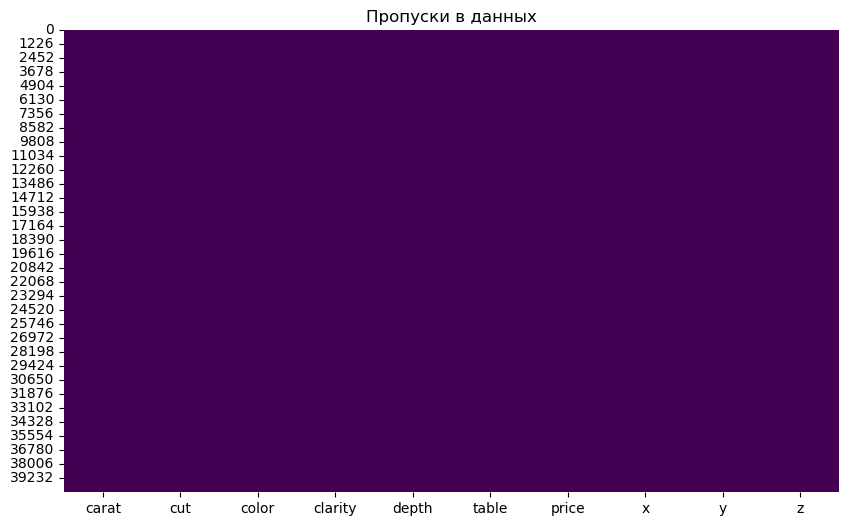

Series([], dtype: float64)


In [10]:
# Визуализация пропусков с помощью тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Пропуски в данных")
plt.show()

# Процент пропусков по каждому столбцу
missing_data = df.isnull().sum() / len(df) * 100
print(missing_data[missing_data > 0].sort_values(ascending=False))

## **Распределение данных**

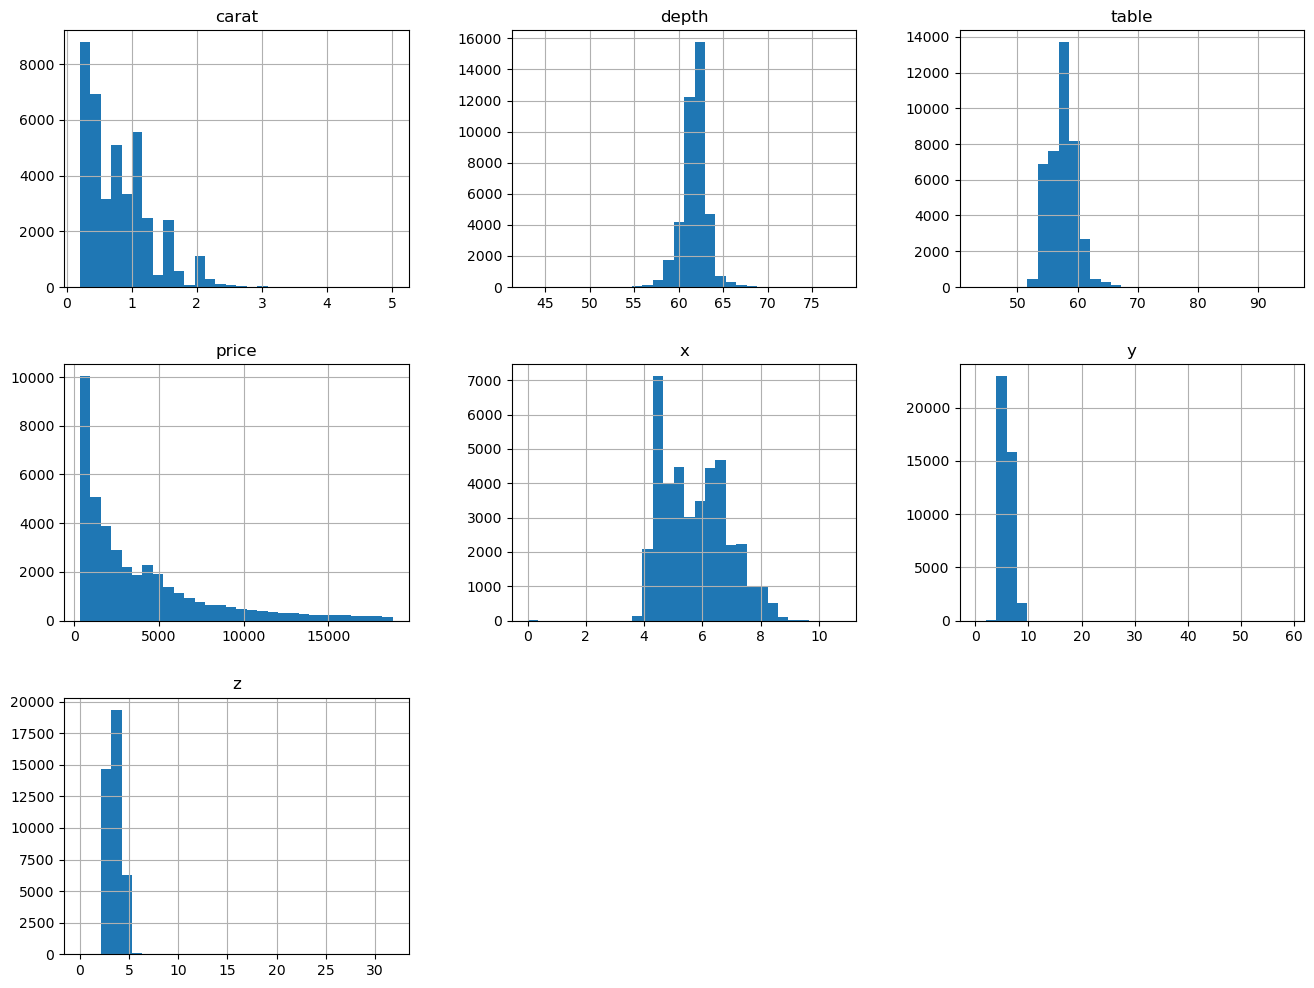

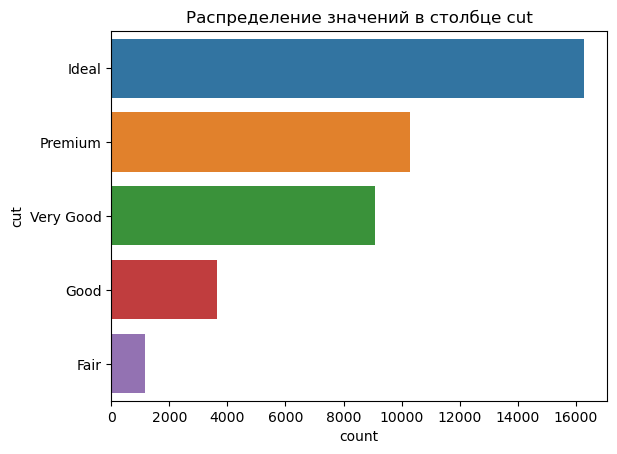

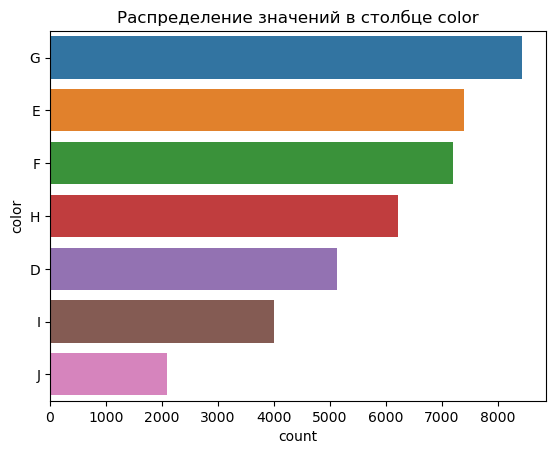

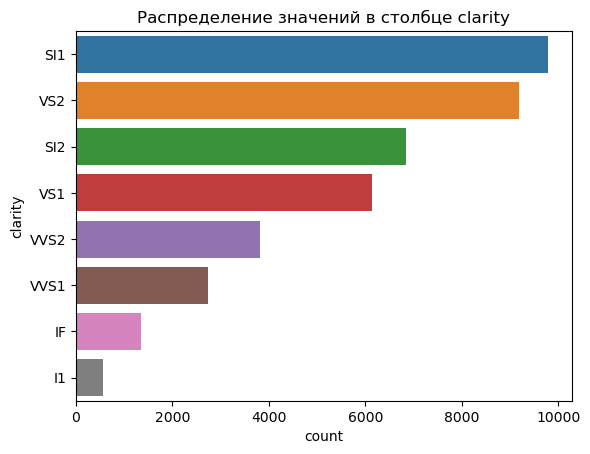

In [11]:
# Гистограммы для всех числовых столбцов
df.hist(figsize=(16, 12), bins=30)
plt.show()

# Анализ категориальных признаков
for col in df.select_dtypes(include=['object']).columns:
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Распределение значений в столбце {col}')
    plt.show()

## **Анализ категориальных переменных**

In [12]:
def analyze_categorical(df):
    # Получаем все категориальные переменные (объекты и категории)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    if len(categorical_cols) == 0:
        print("В датафрейме нет категориальных переменных.")
        return
    
    for col in categorical_cols:
        print(f"=== Анализ '{col}' ===")
        
        # Уникальные значения
        unique_vals = df[col].unique()
        print(f"Уникальные значения: {unique_vals}")
        
        # Частота значений
        value_counts = df[col].value_counts()
        print(f"\nЧастота значений:\n{value_counts}")
        
        # Проверка на пропуски
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"\nПропущенные значения: {missing_count}")
        else:
            print("\nПропущенных значений нет.")
        
        display("\n" + "="*30 + "\n")

# Вызов функции для анализа
analyze_categorical(df)

=== Анализ 'cut' ===
Уникальные значения: ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']

Частота значений:
cut
Ideal        16260
Premium      10302
Very Good     9073
Good          3638
Fair          1182
Name: count, dtype: int64

Пропущенных значений нет.


'\n==============================\n'

=== Анализ 'color' ===
Уникальные значения: ['I' 'E' 'D' 'H' 'F' 'G' 'J']

Частота значений:
color
G    8439
E    7388
F    7197
H    6217
D    5123
I    3996
J    2095
Name: count, dtype: int64

Пропущенных значений нет.


'\n==============================\n'

=== Анализ 'clarity' ===
Уникальные значения: ['SI1' 'SI2' 'VS2' 'VS1' 'VVS1' 'VVS2' 'IF' 'I1']

Частота значений:
clarity
SI1     9795
VS2     9196
SI2     6843
VS1     6143
VVS2    3823
VVS1    2737
IF      1360
I1       558
Name: count, dtype: int64

Пропущенных значений нет.


'\n==============================\n'

## **Анализ выбросов (Outliers)**

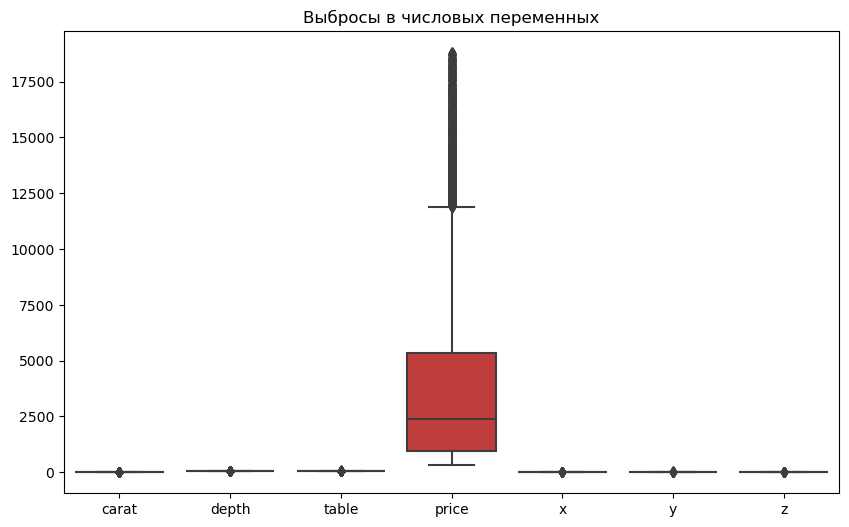

In [13]:
# Ящик с усами для выявления выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title("Выбросы в числовых переменных")
plt.show()

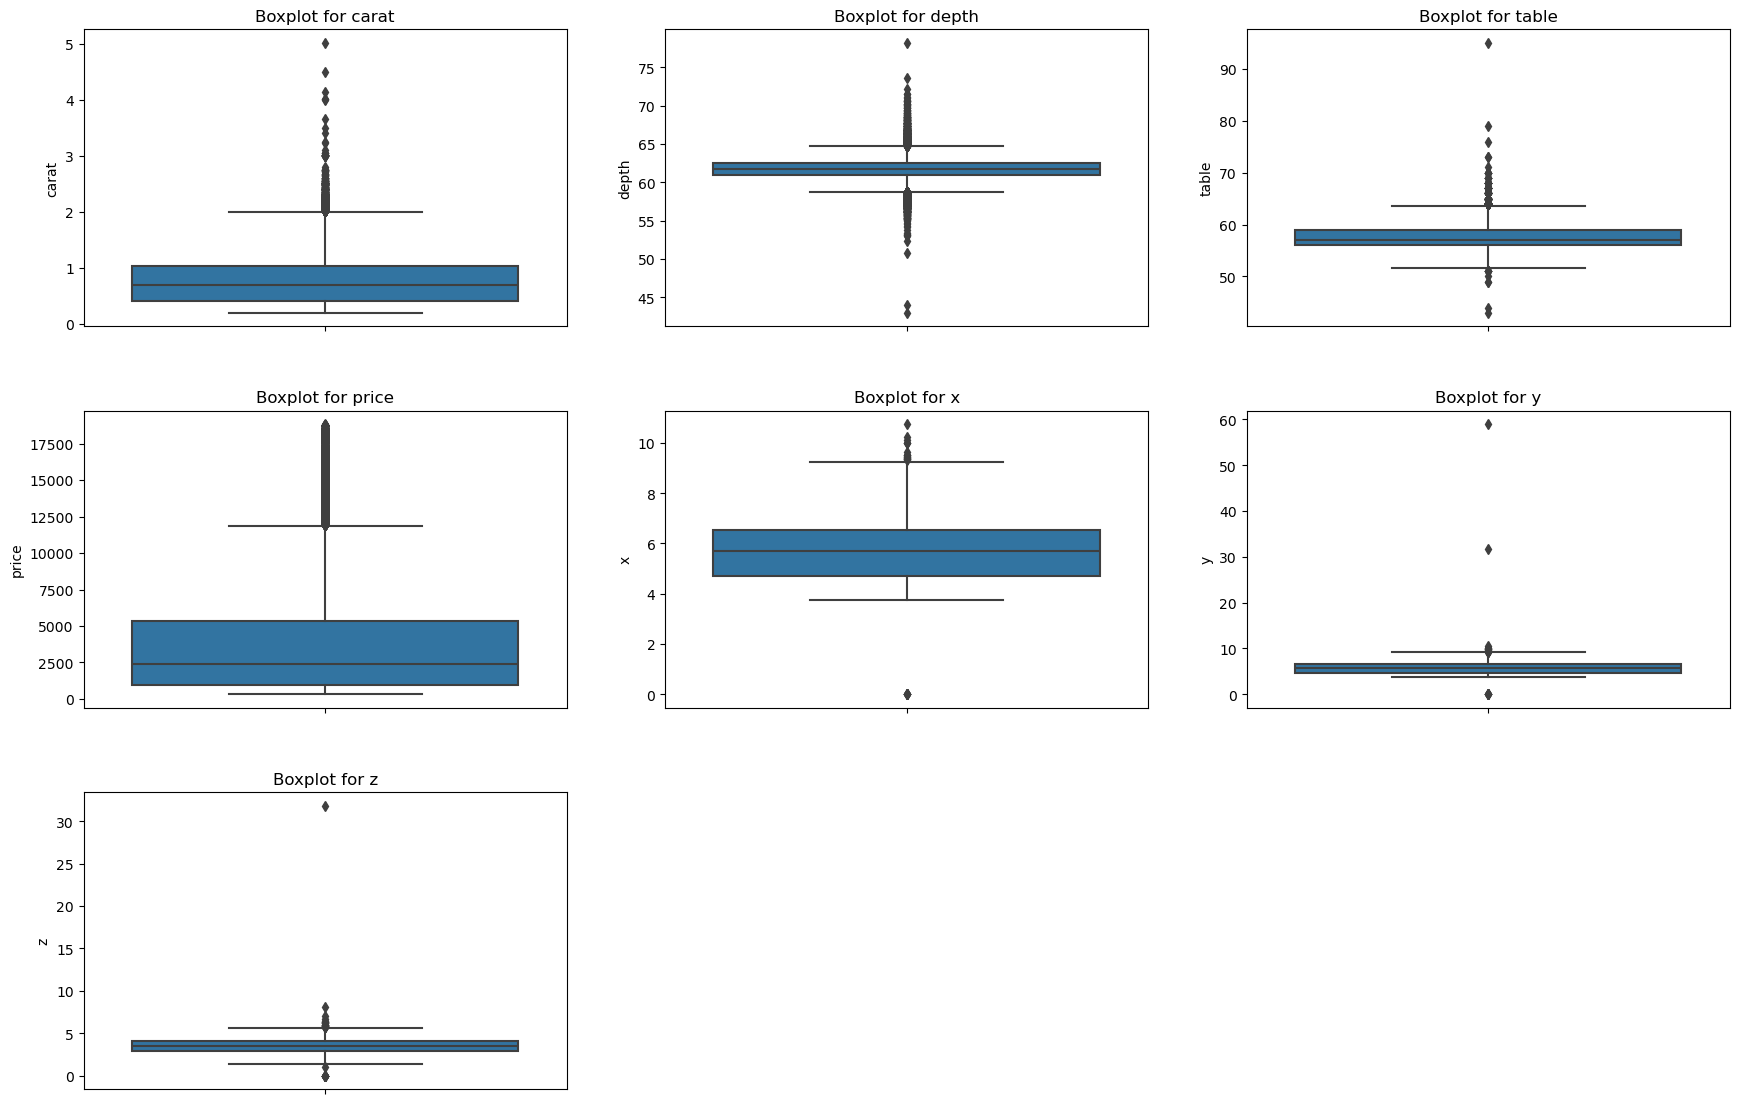

In [14]:
# # Ящик с усами (boxplot) для числовой переменной

# Найдем все числовые столбцы
numerical_columns = df.select_dtypes(include='number').columns

# Определим количество столбцов и строк для сетки
n_cols = 3  # Количество графиков в строке
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Расчет количества строк

# Создаем сетку графиков
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
fig.tight_layout(pad=4.0)  # Отступы между графиками

# Перебираем все числовые столбцы и создаем для каждого boxplot
for i, column in enumerate(numerical_columns):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(data=df, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot for {column}')

# Удаляем пустые оси, если их больше, чем данных
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.show()

## **Кореляционный анализ**

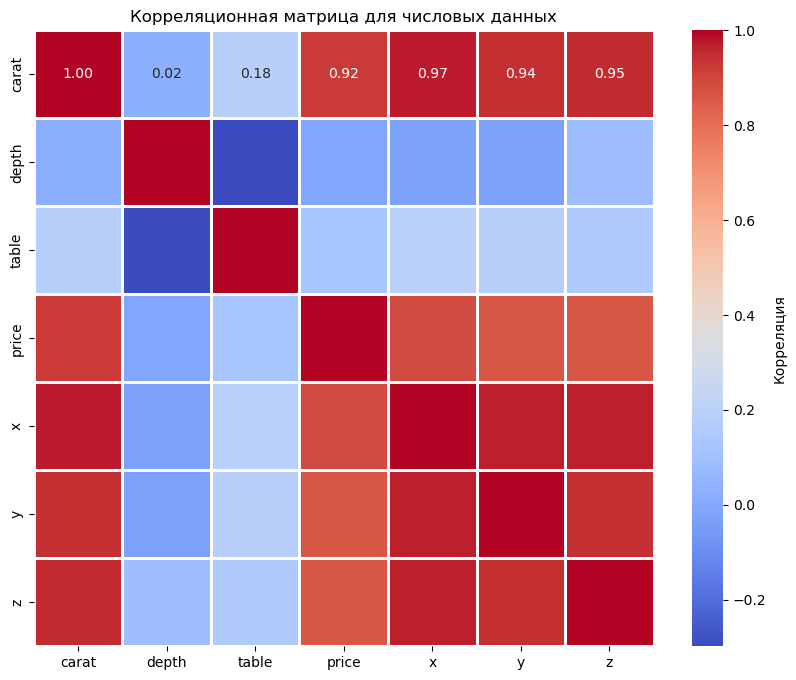

In [15]:
# Оставляем только числовые данные
numeric_df = df.select_dtypes(include=['number'])

# Корреляционная матрица для числовых данных
corr_matrix = numeric_df.corr()

# Тепловая карта корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=1, cbar_kws={'label': 'Корреляция'})
plt.title('Корреляционная матрица для числовых данных')
plt.show()

## **Много анализа не бывает, накинем еще**

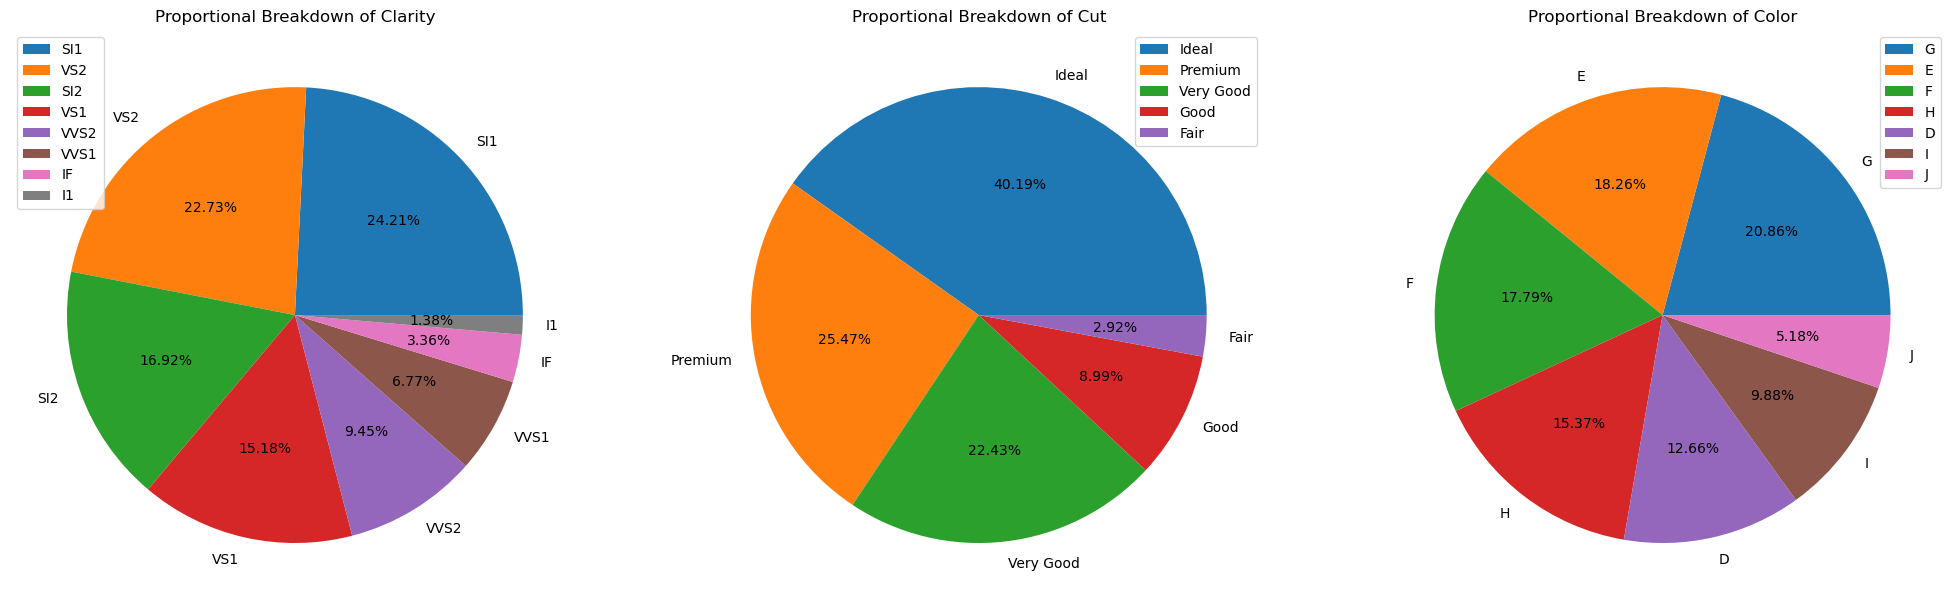

In [16]:
k=df['clarity'].value_counts().reset_index()
k.columns=(['clarity','count'])
k1=df['cut'].value_counts().reset_index()
k1.columns=(['cut','count'])
k2=df['color'].value_counts().reset_index()
k2.columns=(['color','count'])
ax,fig=plt.subplots(1,3,figsize=(25,20))
fig[0].pie(x=k['count'],labels=k['clarity'],autopct='%.2f%%')
fig[0].set_title("Proportional Breakdown of Clarity")
fig[0].legend(k['clarity'])
fig[1].pie(x=k1['count'],labels=k1['cut'],autopct='%.2f%%')
fig[1].set_title("Proportional Breakdown of Cut")
fig[1].legend(k1['cut'])
fig[2].pie(x=k2['count'],labels=k2['color'],autopct='%.2f%%')
fig[2].set_title("Proportional Breakdown of Color")
fig[2].legend(k2['color'])
plt.show()

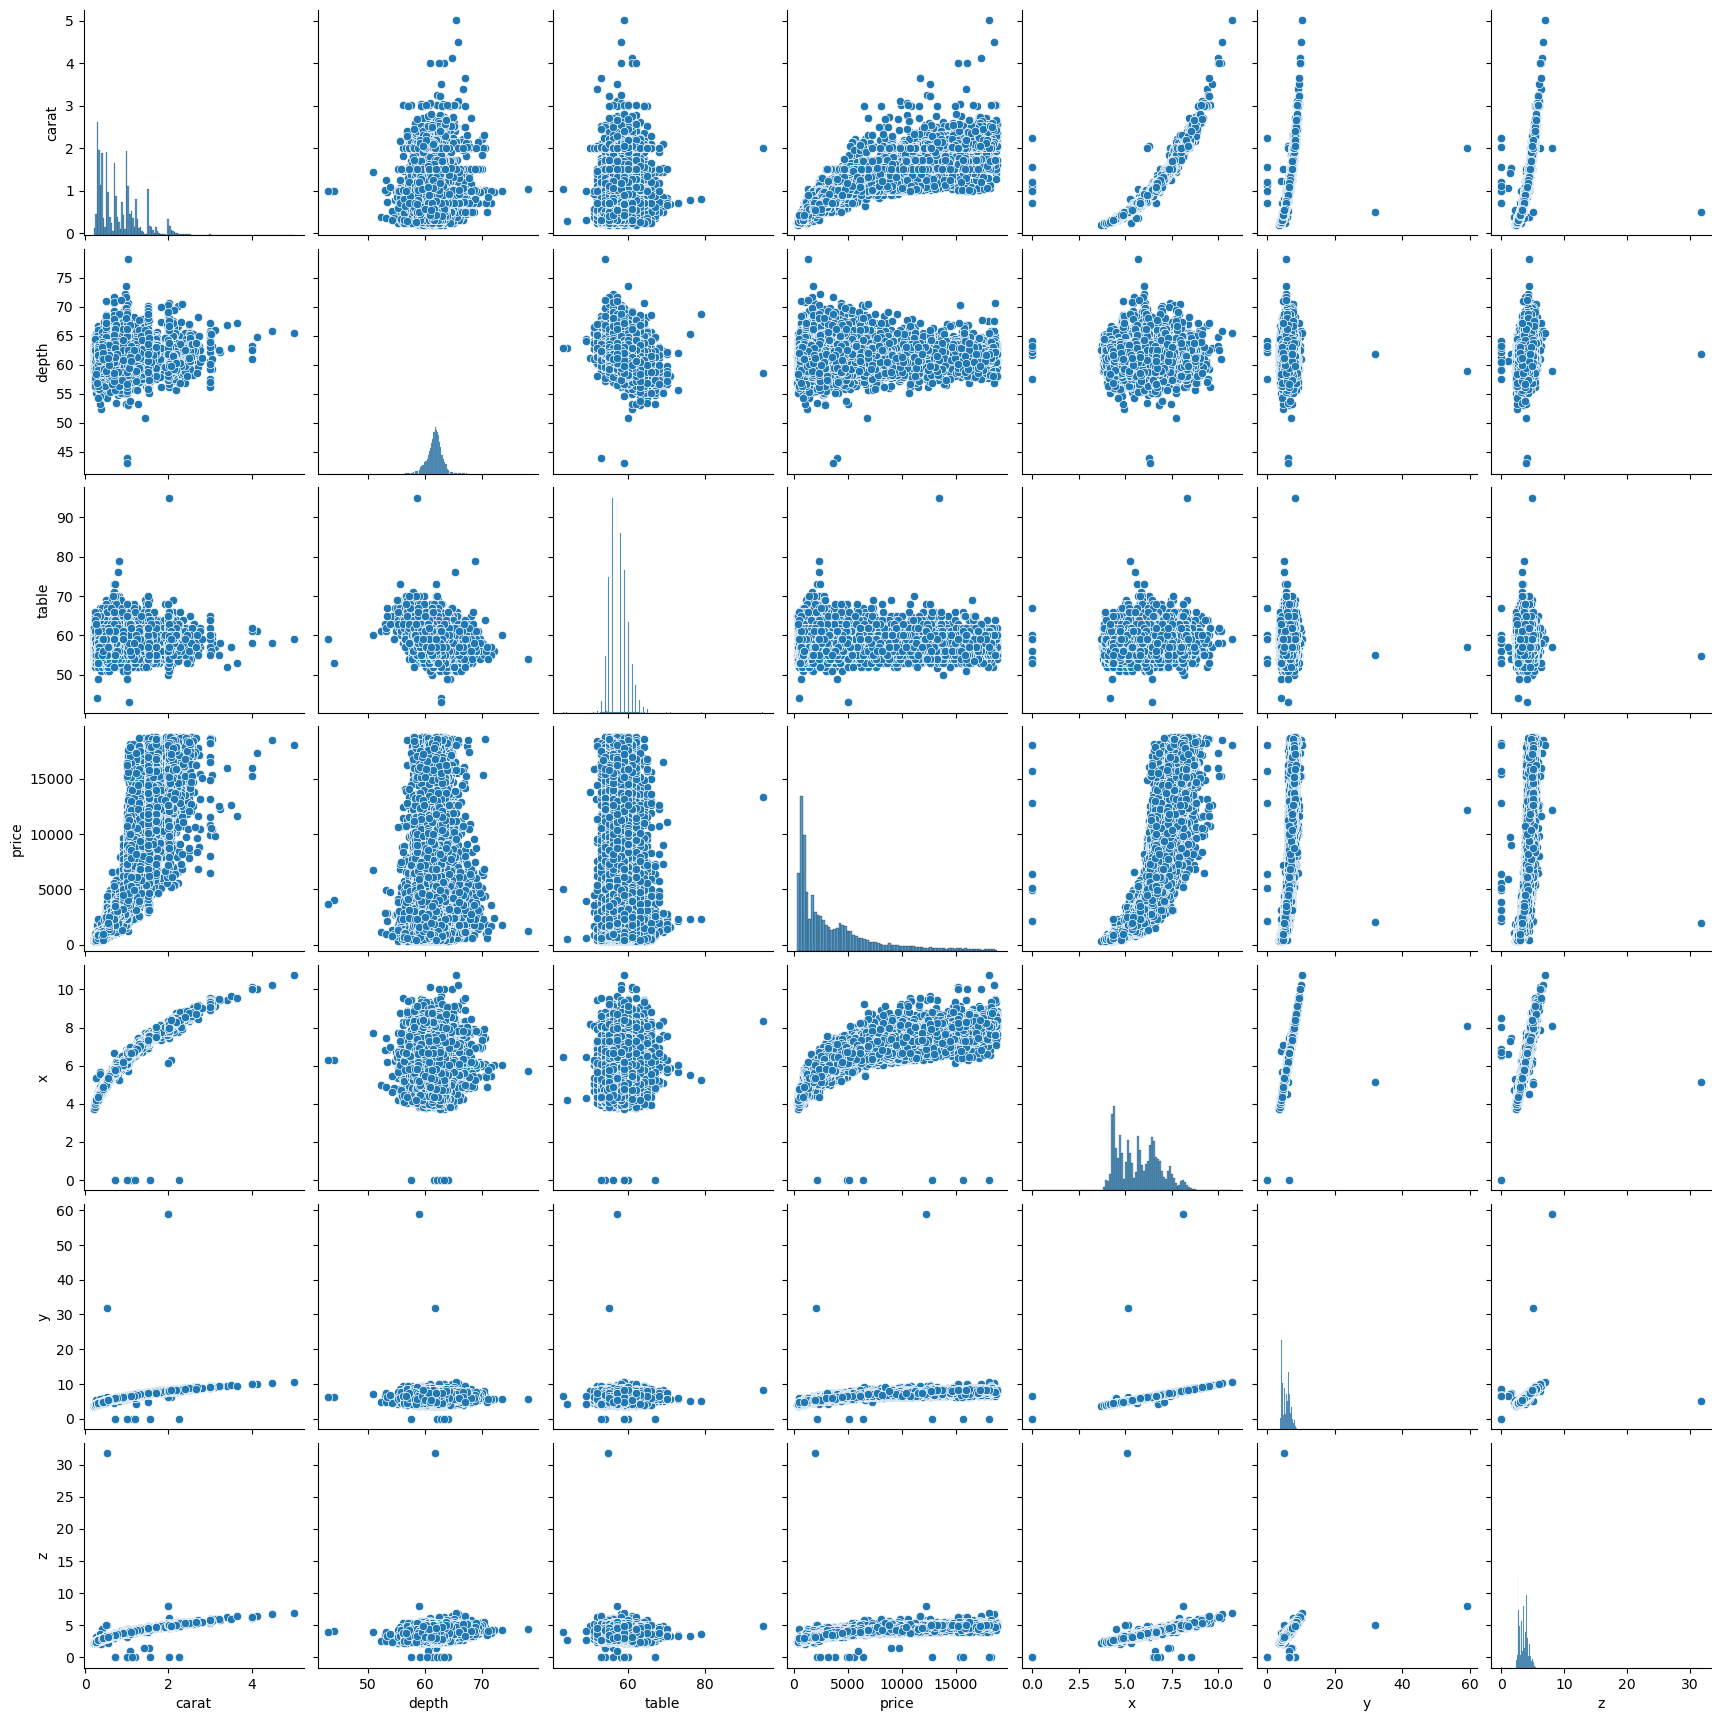

In [17]:
sns.pairplot(df)
plt.show()

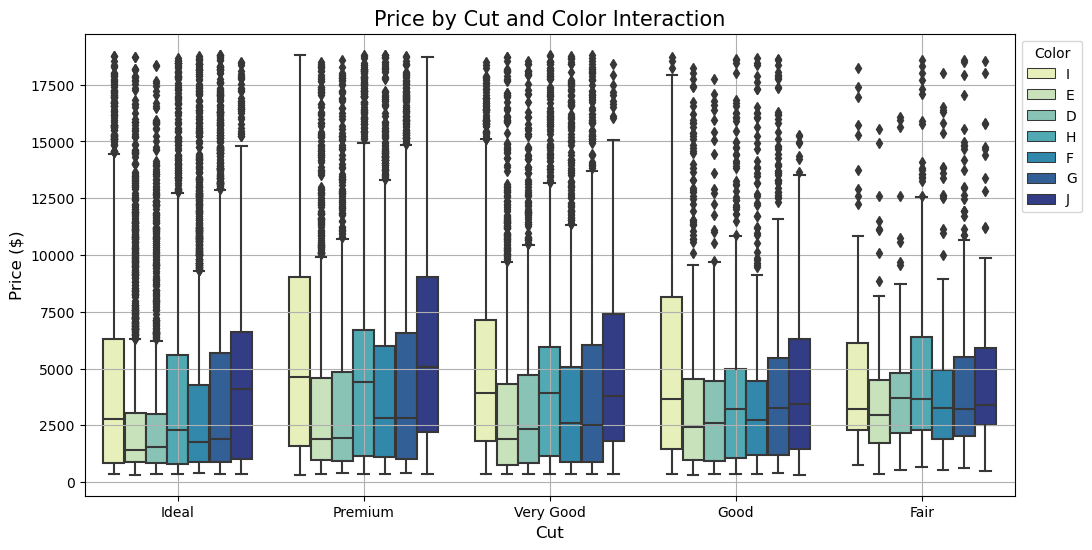

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(x='cut', y='price', hue='color', data=df, palette='YlGnBu')
plt.title('Price by Cut and Color Interaction', fontsize=15)
plt.xlabel('Cut', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(title='Color', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

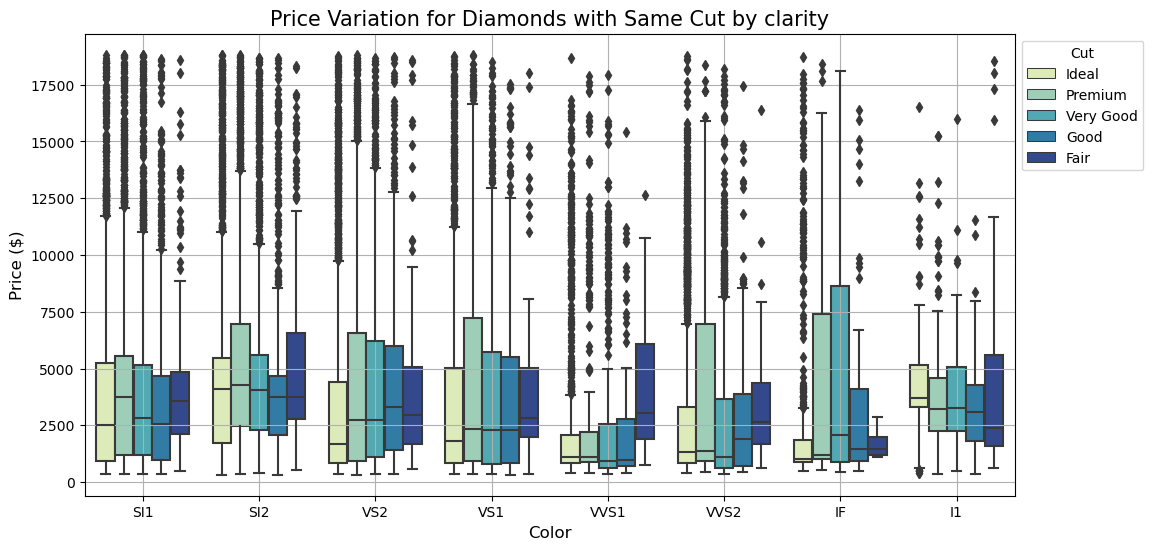

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(x='clarity', y='price', hue='cut', data=df, palette='YlGnBu')
plt.title('Price Variation for Diamonds with Same Cut by clarity', fontsize=15)
plt.xlabel('Color', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(title='Cut', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# **Стыренный код у КЮ** ссылка на Github https://github.com/kshilin/machine-learning/blob/main/07-transformers/ML-2024-07-01.ipynb (соблюдаем авторские права)

## **Каратная цикличность** 

(0.0, 3.0)

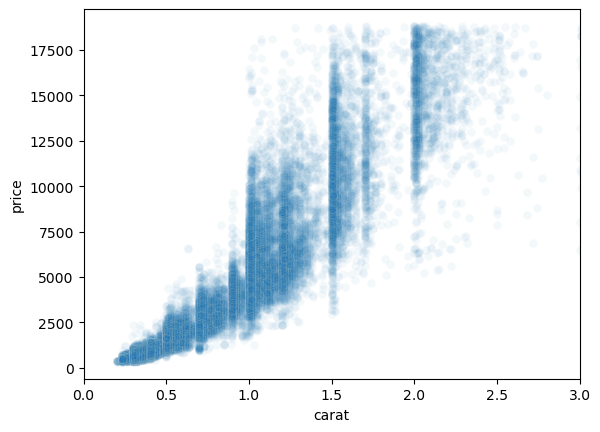

In [20]:
sns.scatterplot(data = df, x = 'carat', y = 'price', alpha=0.05);
plt.xlim(0,3)

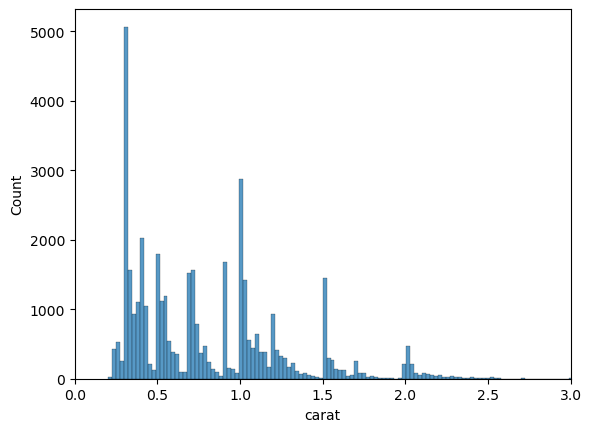

In [21]:
sns.histplot(data=df, x="carat", bins=200);
plt.xlim(0,3);

## **Проблема датасета - нелинейность роста цены**

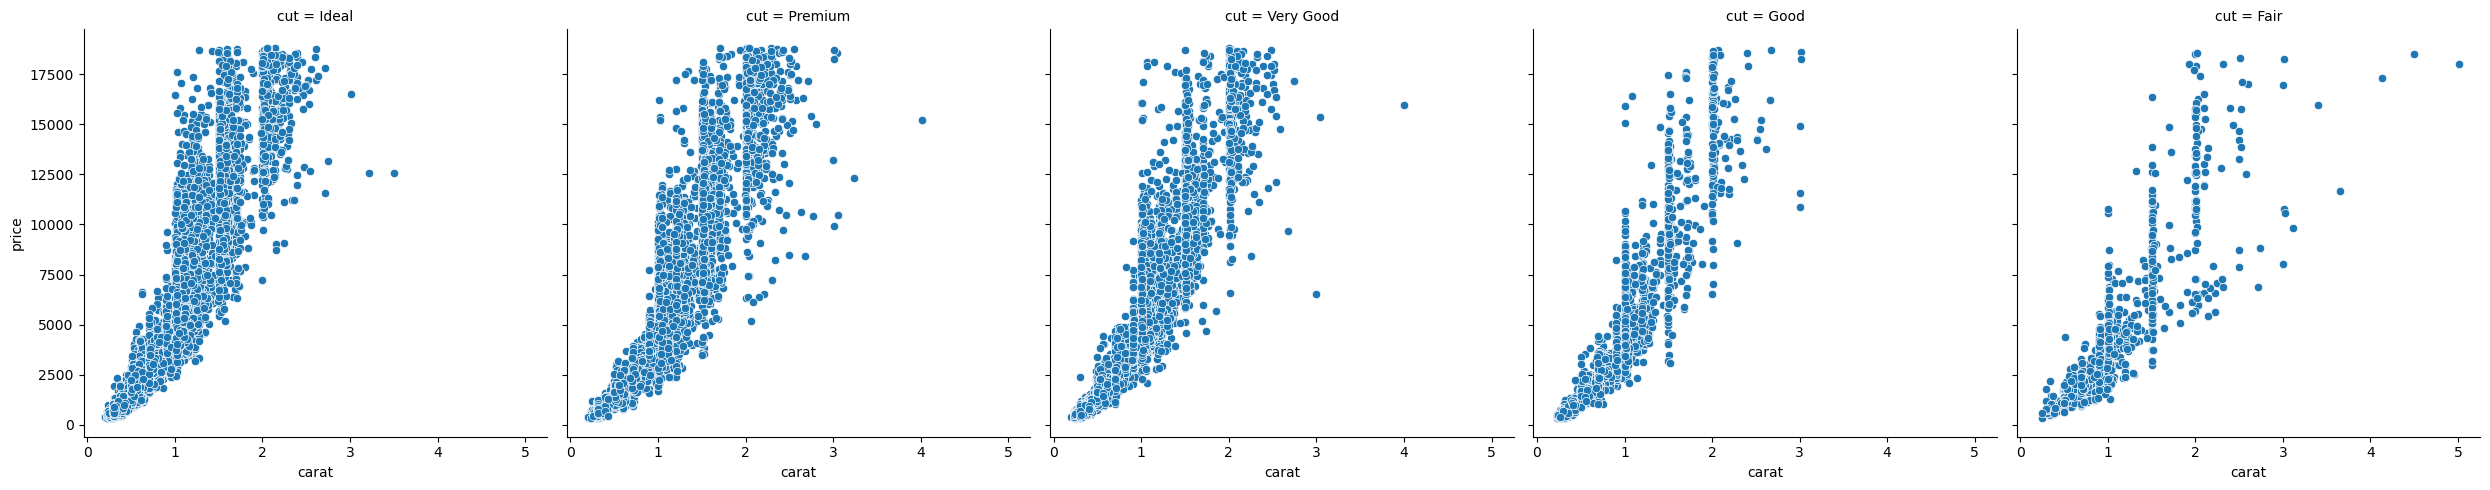

In [22]:
sns.relplot(data = df, x = 'carat', y = 'price', col = 'cut', kind = 'scatter');

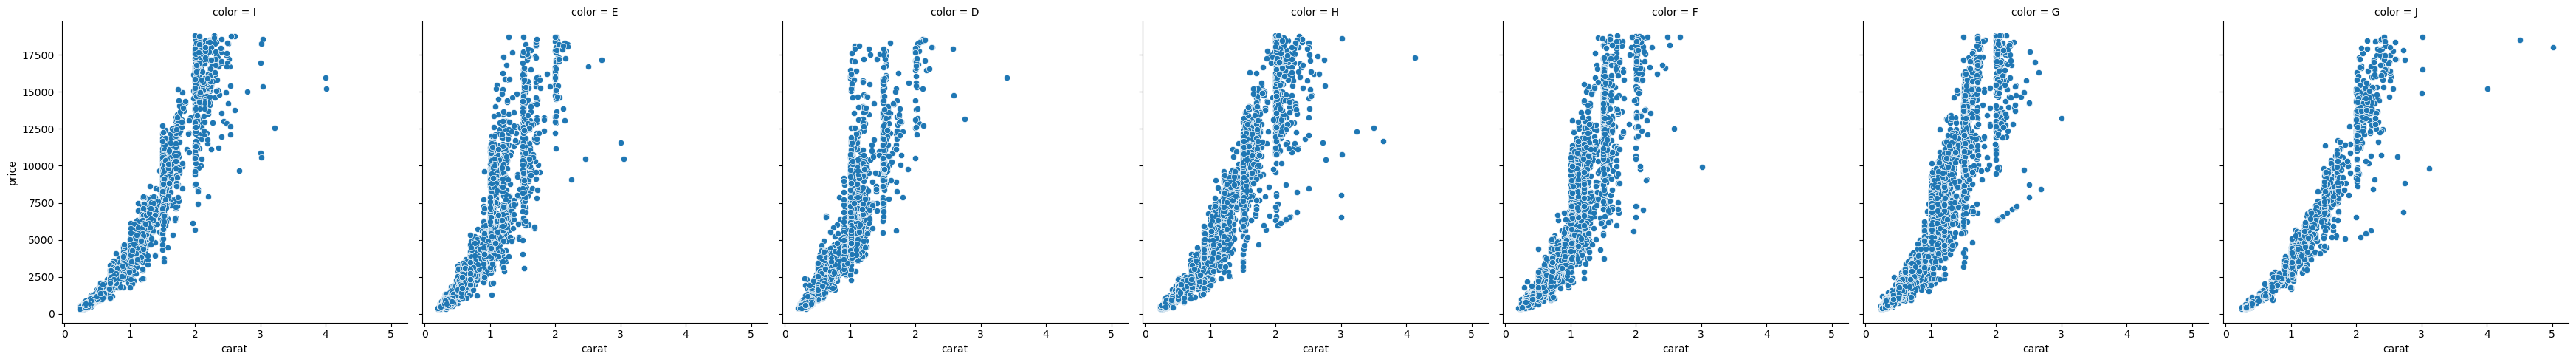

In [23]:
sns.relplot(data = df, x = 'carat', y = 'price', col = 'color', kind = 'scatter');

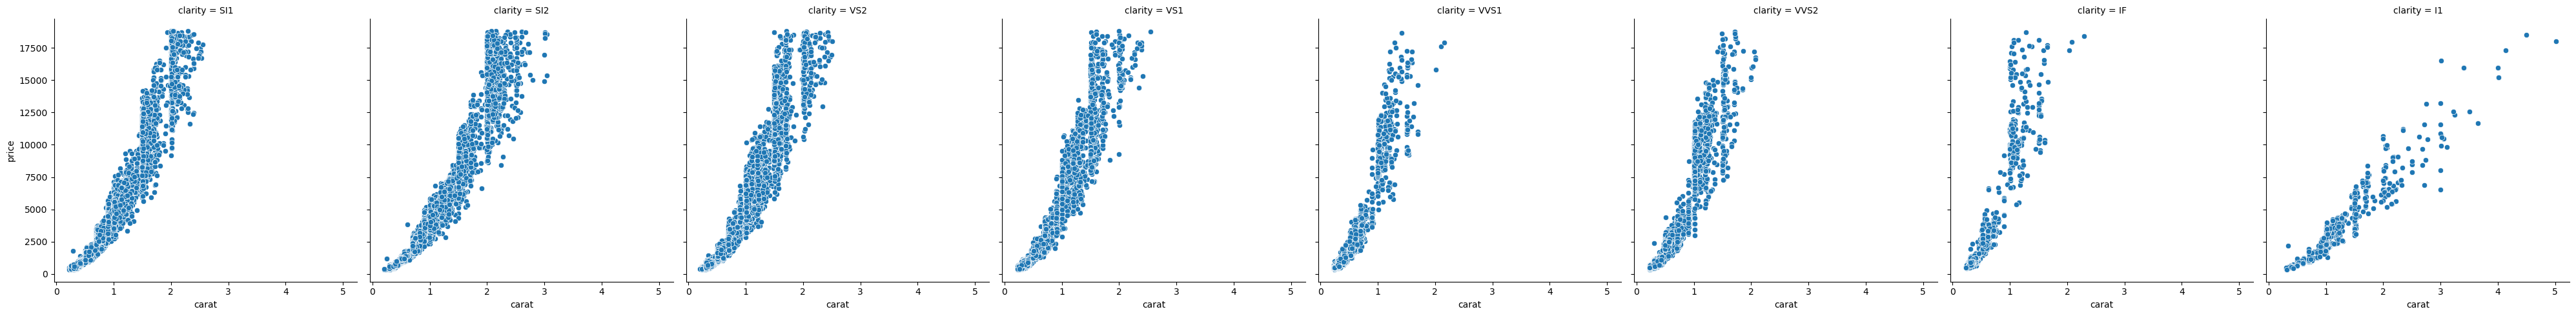

In [24]:
sns.relplot(data = df, x = 'carat', y = 'price', col = 'clarity', kind = 'scatter');

## **Проблема - целевая переменная**

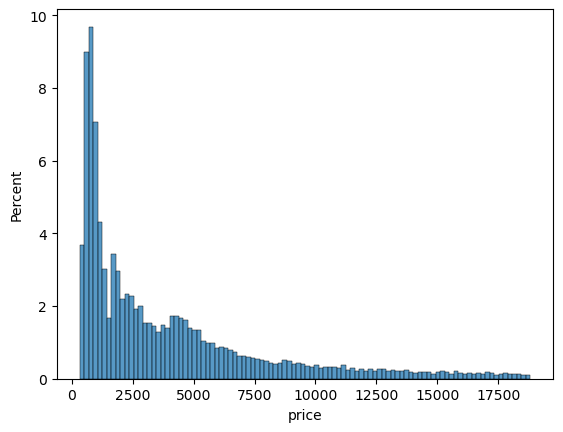

In [25]:
sns.histplot(data=df, x="price", bins=100, stat='percent');

## **Проблема датасета**

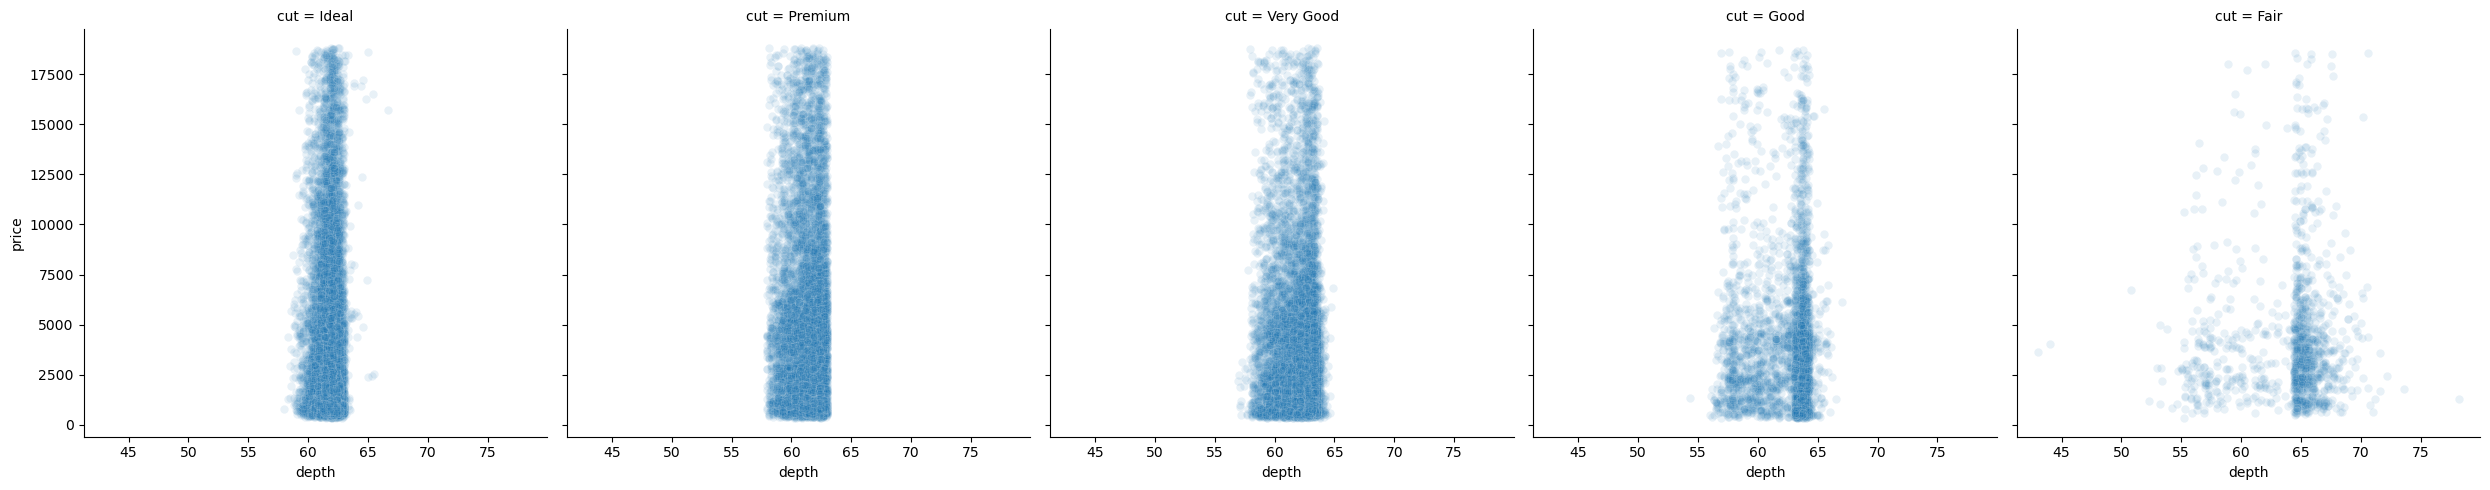

In [26]:
sns.relplot(data = df, x = 'depth', y = 'price', col = 'cut', kind = 'scatter', alpha=0.1);

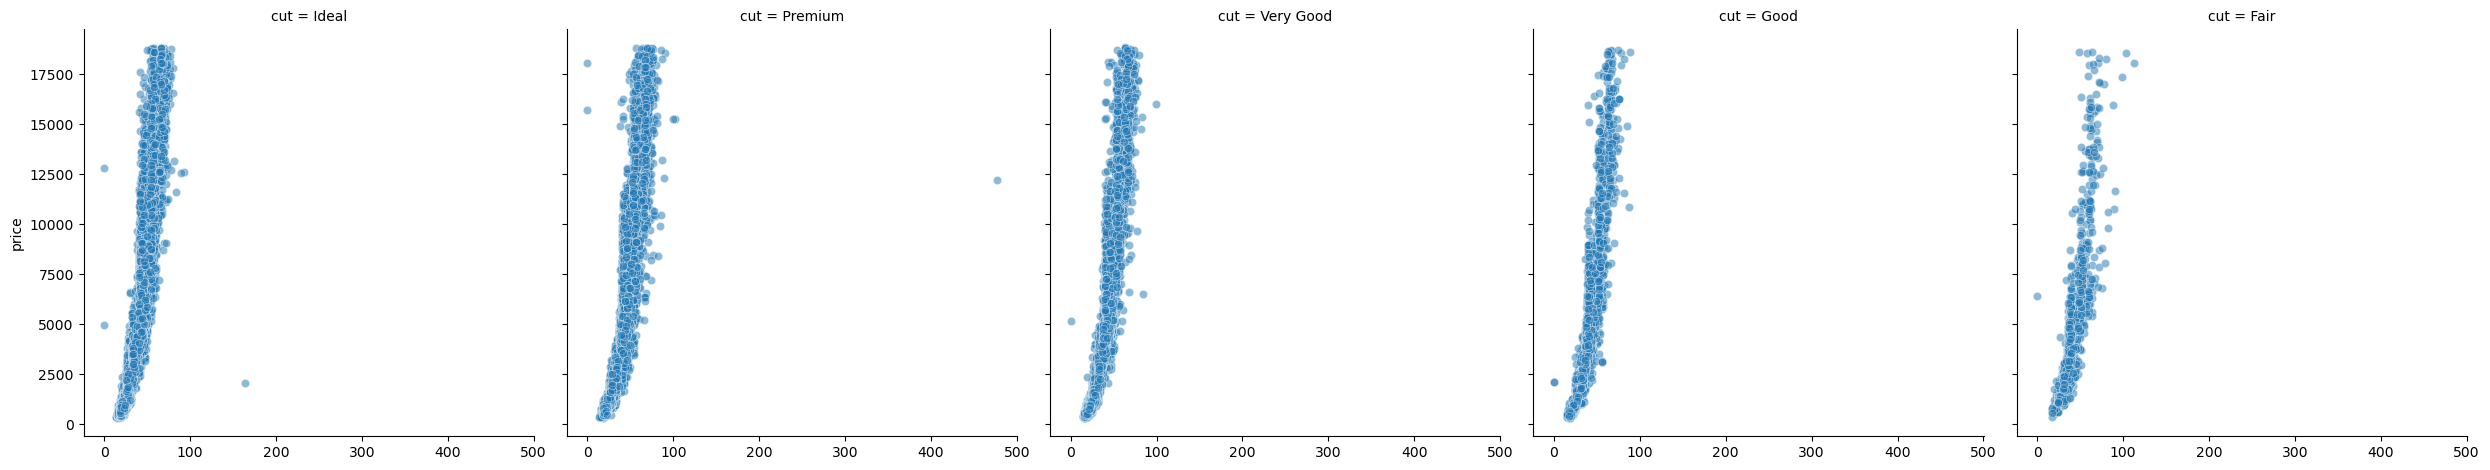

In [27]:
sns.relplot(data = df, x = df['x']*df['y'], y = 'price', col = 'cut', kind = 'scatter', alpha=0.5);

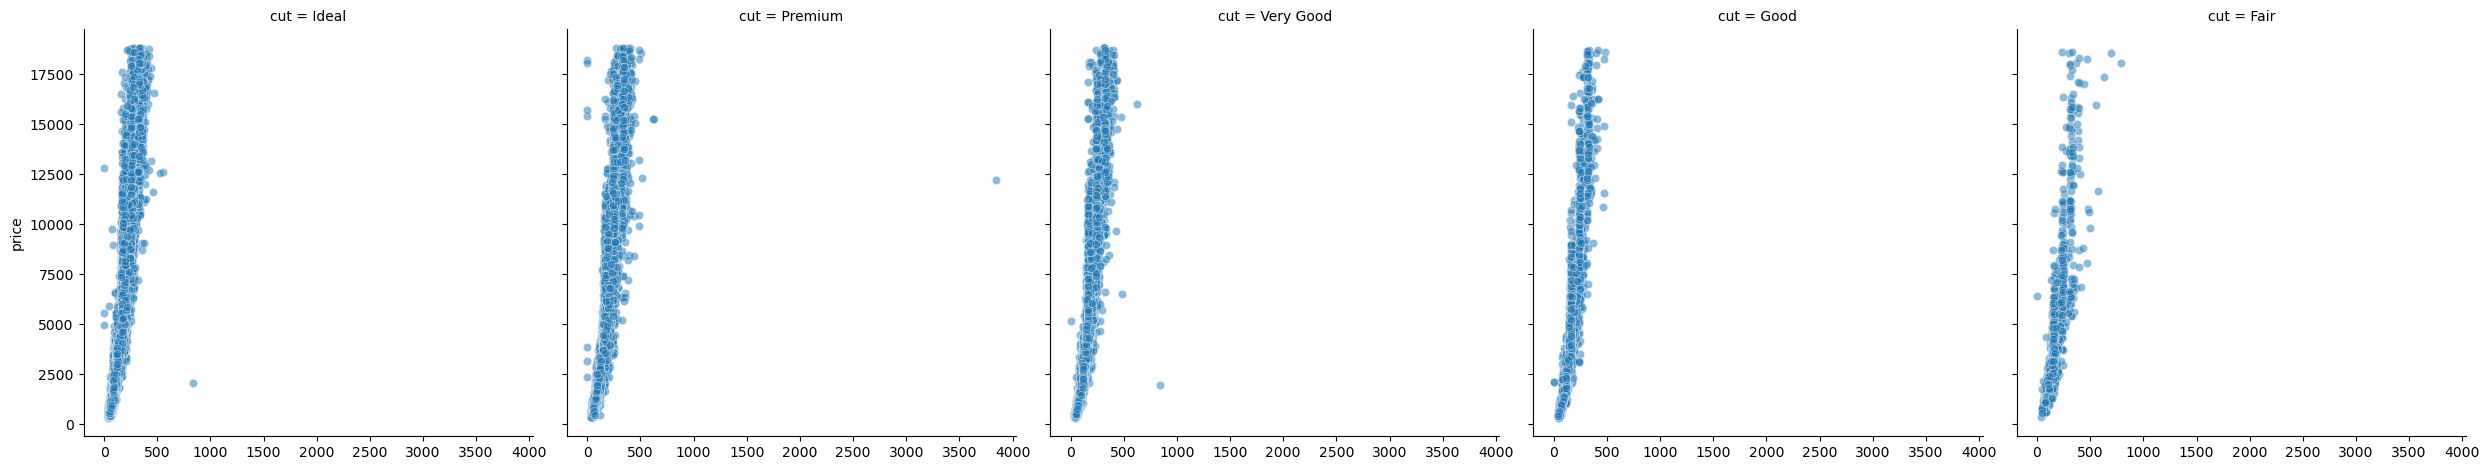

In [28]:
sns.relplot(data = df, x = df['x']*df['y']*df['z'], y = 'price', col = 'cut', kind = 'scatter', alpha=0.5);

# **ВЫВОДЫ ПО ИССЛЕДОВАНИЮ ДАННЫХ**

**Выбросы**
-Использовать статистические методы (например, межквартильный размах, z-оценка) Их можно исключить или сгладить, заменяя средними или медианными значениями. Или мой любимый кокс-бокс 

**Сильная корреляция признаков**
-Определить корреляцию между признаками с помощью коэффициента Пирсона или Спирмена и исключить одни из сильно коррелированных признаков, используя методы отбора признаков (например, метод главных компонент).

**Смещения и несбалансированность данных**
- Проблема: Категориальные переменные, такие как "cut", "color", и "clarity", могут быть несбалансированы, что влияет на модели и точность предсказаний.
Решение: Использовать методы балансировки данных, такие как увеличение данных (oversampling) или уменьшение данных (undersampling), либо применять взвешенные модели.

**Сильная мультиколлинеарность признаков**
-Проблема: Некоторые признаки могут зависеть друг от друга, приводя к мультиколлинеарности, что осложняет анализ и работу моделей.
-Решение: Для обнаружения мультиколлинеарности использовать методы анализа, такие как VIF (Variance Inflation Factor), и, при необходимости, удалить или объединить коррелированные признаки.

**Скейлинг (масштабирование признаков)**
-Проблема: Признаки, такие как "carat" и "price", могут иметь разный масштаб, что затрудняет анализ и может влиять на работу моделей.
-Решение: Нормализовать или стандартизировать данные, особенно если используется метод, чувствительный к масштабу данных (например, линейные модели или метод ближайших соседей).

**Сезонные и временные компоненты**
--Проблема: Если данные о бриллиантах обновляются, например, в зависимости от рыночной стоимости или сезона, то такие компоненты могут привести к неустойчивости модели.
--Решение: Добавить временные признаки, чтобы учесть эффект времени, либо использовать модели временного ряда, если такая зависимость подтверждается.

**Типичные ошибки ввода данных**
--Проблема: Возможны опечатки в категориальных переменных (например, ошибки в категориях "cut", "color", "clarity").
__Решение: Проверить категории на ошибки, привести к единообразию форматирования (нижний регистр, удаление лишних пробелов) и, если нужно, объединить схожие категории.

**Шум и малая информативность некоторых признаков**
-Проблема: Некоторые признаки могут не добавлять полезной информации, или быть избыточными.
-Решение: Применить методы отбора признаков (например, анализ значимости признаков, метод случайного леса для ранжирования) и оставить только те, которые вносят вклад в результат.

**Зависимость целевого признака от других переменных**
--Проблема: Цена бриллианта может зависеть от множества факторов (например, от компании-поставщика или местоположения рынка).
--Решение: Добавить в модель дополнительные факторы, если такие данные доступны, либо нормализовать цену относительно известных данных, чтобы исключить влияние других переменных.


# Конкретика: 

1. Дропнуть дубликаты
2. Приколы с x y z тип 0 и все такое
print(" total number of zeros in a row :  ", data.query("x == 0 | y== 0 | z == 0").shape[0])
data.query("x == 0 | y== 0 | z == 0")
4. 

# Умные мысли 
The x, y, and z variables represent the measurements of the diamond's length, width, and depth. Therefore, they have a high and positive correlation with carat and price. Based on the information we obtained from previous graphs and as we can see in the correlation graph, carat is also significantly affected. We had previously observed that the depth and table variables had low variances, and consequently, their correlations also appear to be low. While they can create noise in modeling, I will still keep them in the model

# **Идеи** 
- Подумать как правильно перевести категориальные переменные 
- Сделать полиномиальный фичинг (подумать какой именно)
- Биннинг 

## **Планы с работой с проблемными штуками, все "проблемные данные просто дропну" их должно быть немного от общего числа около 5%**

# **БЛОК_1. РАБОТА С ДАННЫМИ (Очистка от дубликатов и различных шумов)**

In [29]:
display(df.head())

carat        cut color clarity  depth  table  price     x     y     z
0   0.55      Ideal     I     SI1   61.7   55.0   1134  5.29  5.31  3.27
1   0.94    Premium     E     SI1   62.4   56.0   4580  6.27  6.24  3.90
2   0.33    Premium     E     SI2   60.0   59.0    594  4.49  4.47  2.69
3   0.31      Ideal     D     VS2   59.4   56.0    879  4.45  4.40  2.63
4   2.01  Very Good     H     SI1   62.8   59.0  17759  7.99  8.04  5.03

In [30]:
display(df.describe())

carat         depth         table         price             x  \
count  40455.000000  40455.000000  40455.000000  40455.000000  40455.000000   
mean       0.797227     61.746219     57.451551   3938.457274      5.728667   
std        0.474440      1.420742      2.230915   3998.851904      1.123597   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    945.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.690000   
75%        1.040000     62.500000     59.000000   5324.500000      6.540000   
max        5.010000     78.200000     95.000000  18818.000000     10.740000   

                  y            z  
count  40455.000000  40455.00000  
mean       5.732720      3.53753  
std        1.153284      0.70956  
min        0.000000      0.00000  
25%        4.720000      2.91000  
50%        5.710000      3.53000  
75%        6.530000      4.03000  
max       58.900000     31.80000

In [31]:
df = df[(df['x'] >= 2) & (df['x'] <= 11)]
df = df[(df['y'] >= 2) & (df['y'] <= 11)]
df = df[(df['z'] >= 2) & (df['z'] <= 7)]

df = df[(df['table'] >= 40) & (df['table'] <= 80)]
df = df[(df['depth'] >= 45) & (df['depth'] <= 75)]

df = df.drop_duplicates()

df.shape

(40354, 10)

# **АНАЛИЗ ОБРАБОТАННЫХ ДАННЫХ**

## **Обработаем данные**

In [32]:
# 4 значения
df = df[(df['table'] >= 40) & (df['table'] <= 80)]
df = df[(df['depth'] >= 45) & (df['depth'] <= 75)]

# 14 Нул значений

df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)


# 78 дубликатов
df = df.drop_duplicates()

df = df[(df['x'] >= 2) & (df['x'] <= 11)]
df = df[(df['y'] >= 2) & (df['y'] <= 11)]
df = df[(df['z'] >= 2) & (df['z'] <= 7)]

df.shape

(40354, 10)

# *Чудим с depth* (больше не буду тк стало хуже)

In [33]:
df_copy = df.copy()
df_copy['depth'] = (2 * df['z'] / (df['x'] + df['y']))*100


In [34]:
df_copy.head()

carat        cut color clarity      depth  table  price     x     y     z
0   0.55      Ideal     I     SI1  61.698113   55.0   1134  5.29  5.31  3.27
1   0.94    Premium     E     SI1  62.350120   56.0   4580  6.27  6.24  3.90
2   0.33    Premium     E     SI2  60.044643   59.0    594  4.49  4.47  2.69
3   0.31      Ideal     D     VS2  59.435028   56.0    879  4.45  4.40  2.63
4   2.01  Very Good     H     SI1  62.757330   59.0  17759  7.99  8.04  5.03

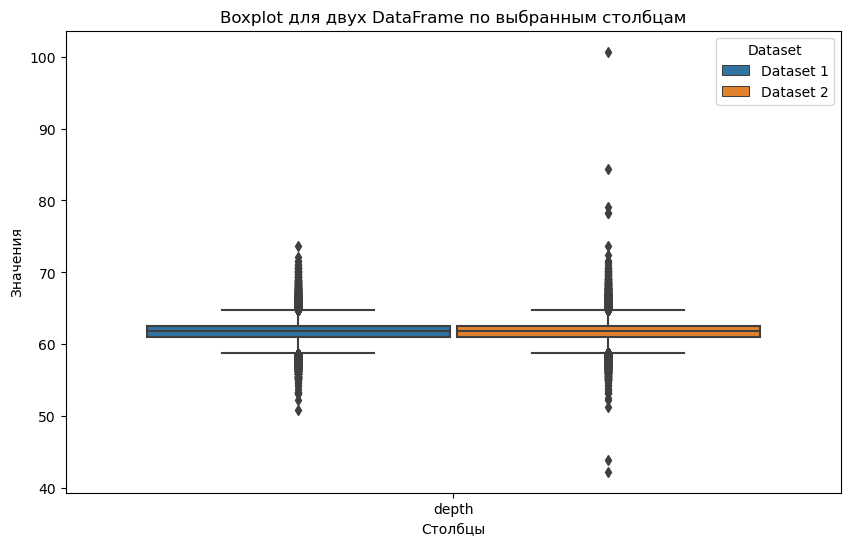

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Пример DataFrame
# df1 = pd.DataFrame({'column_name': [...]})
# df2 = pd.DataFrame({'column_name': [...]})

# Указание столбцов для построения boxplot
columns_to_plot = ['depth']  # Замените на нужные столбцы

# Создаем новый DataFrame, объединяя данные из df1 и df2
combined_df = pd.concat([
    df[columns_to_plot].assign(dataset='Dataset 1'),
    df_copy[columns_to_plot].assign(dataset='Dataset 2')
])

# Построение boxplot для каждого столбца и датасета
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df.melt(id_vars='dataset', value_vars=columns_to_plot),
            x='variable', y='value', hue='dataset')
plt.xlabel('Столбцы')
plt.ylabel('Значения')
plt.title('Boxplot для двух DataFrame по выбранным столбцам')
plt.legend(title='Dataset')
plt.show()


# *Перекодируем категориальные переменные* 

In [36]:
label_encoder = LabelEncoder()
columns_to_encode = ['cut', 'clarity', 'color']  
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])
display("Encoded DataFrame:")
display(df.head())

'Encoded DataFrame:'

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.55    2      5        2   61.7   55.0   1134  5.29  5.31  3.27
1   0.94    3      1        2   62.4   56.0   4580  6.27  6.24  3.90
2   0.33    3      1        3   60.0   59.0    594  4.49  4.47  2.69
3   0.31    2      0        5   59.4   56.0    879  4.45  4.40  2.63
4   2.01    4      4        2   62.8   59.0  17759  7.99  8.04  5.03

# **АНАЛИЗ перекодированных и подправленных данных**

### **Распределение данных**

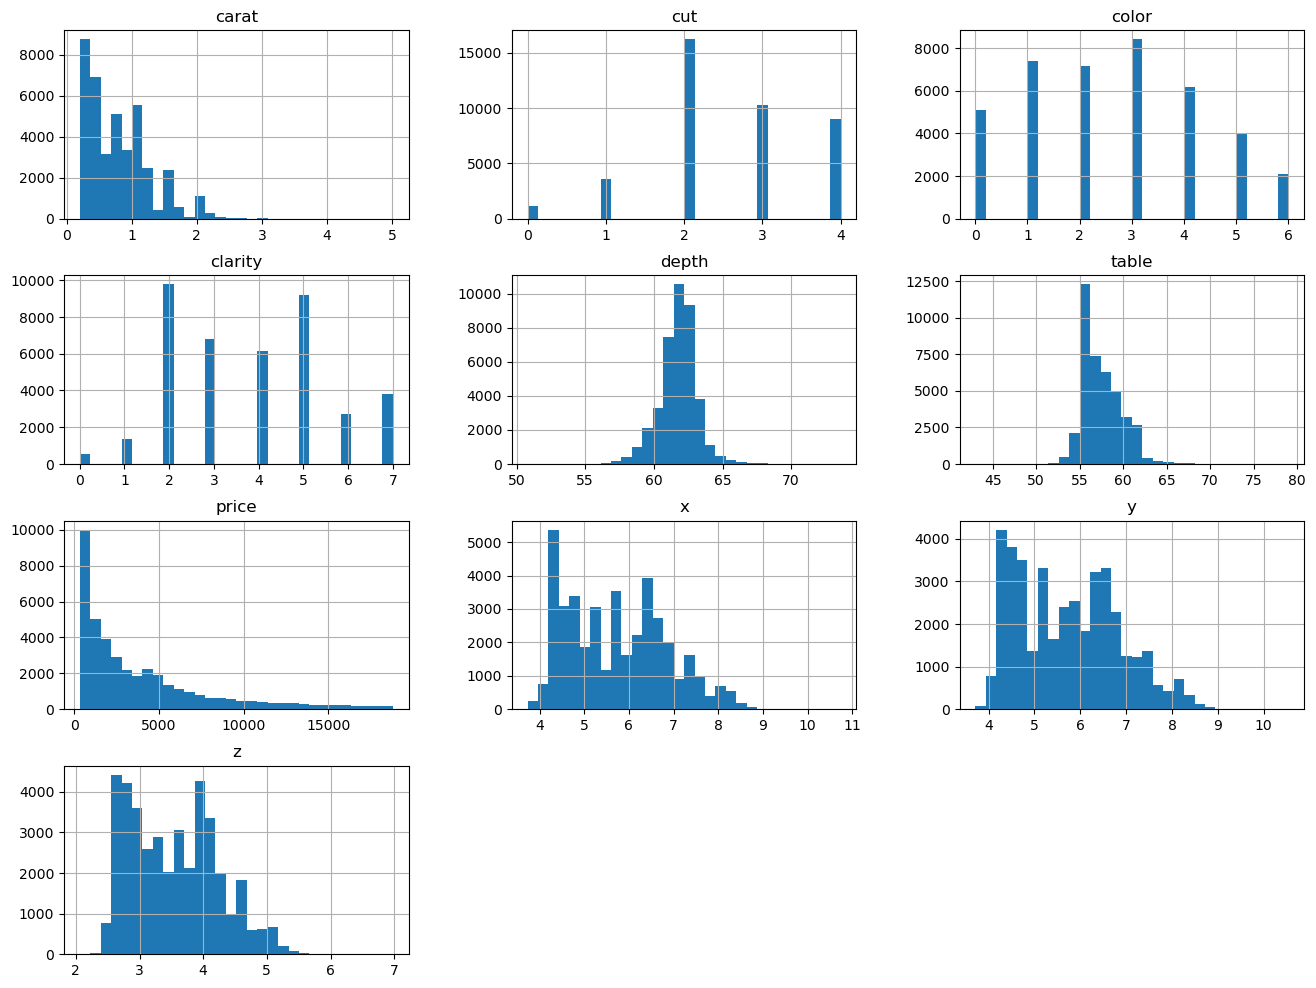

In [37]:
# Гистограммы для всех числовых столбцов
df.hist(figsize=(16, 12), bins=30)
plt.show()

# Анализ категориальных признаков
for col in df.select_dtypes(include=['object']).columns:
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Распределение значений в столбце {col}')
    plt.show()

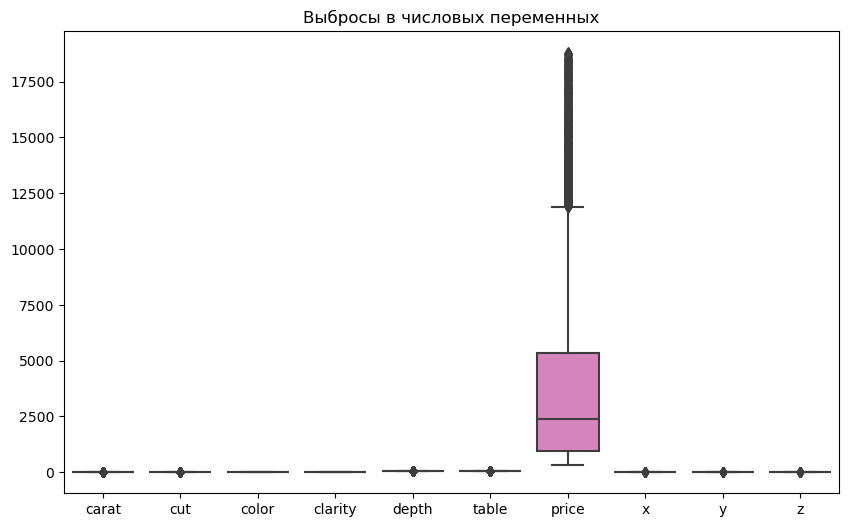

In [38]:
# Ящик с усами для выявления выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title("Выбросы в числовых переменных")
plt.show()

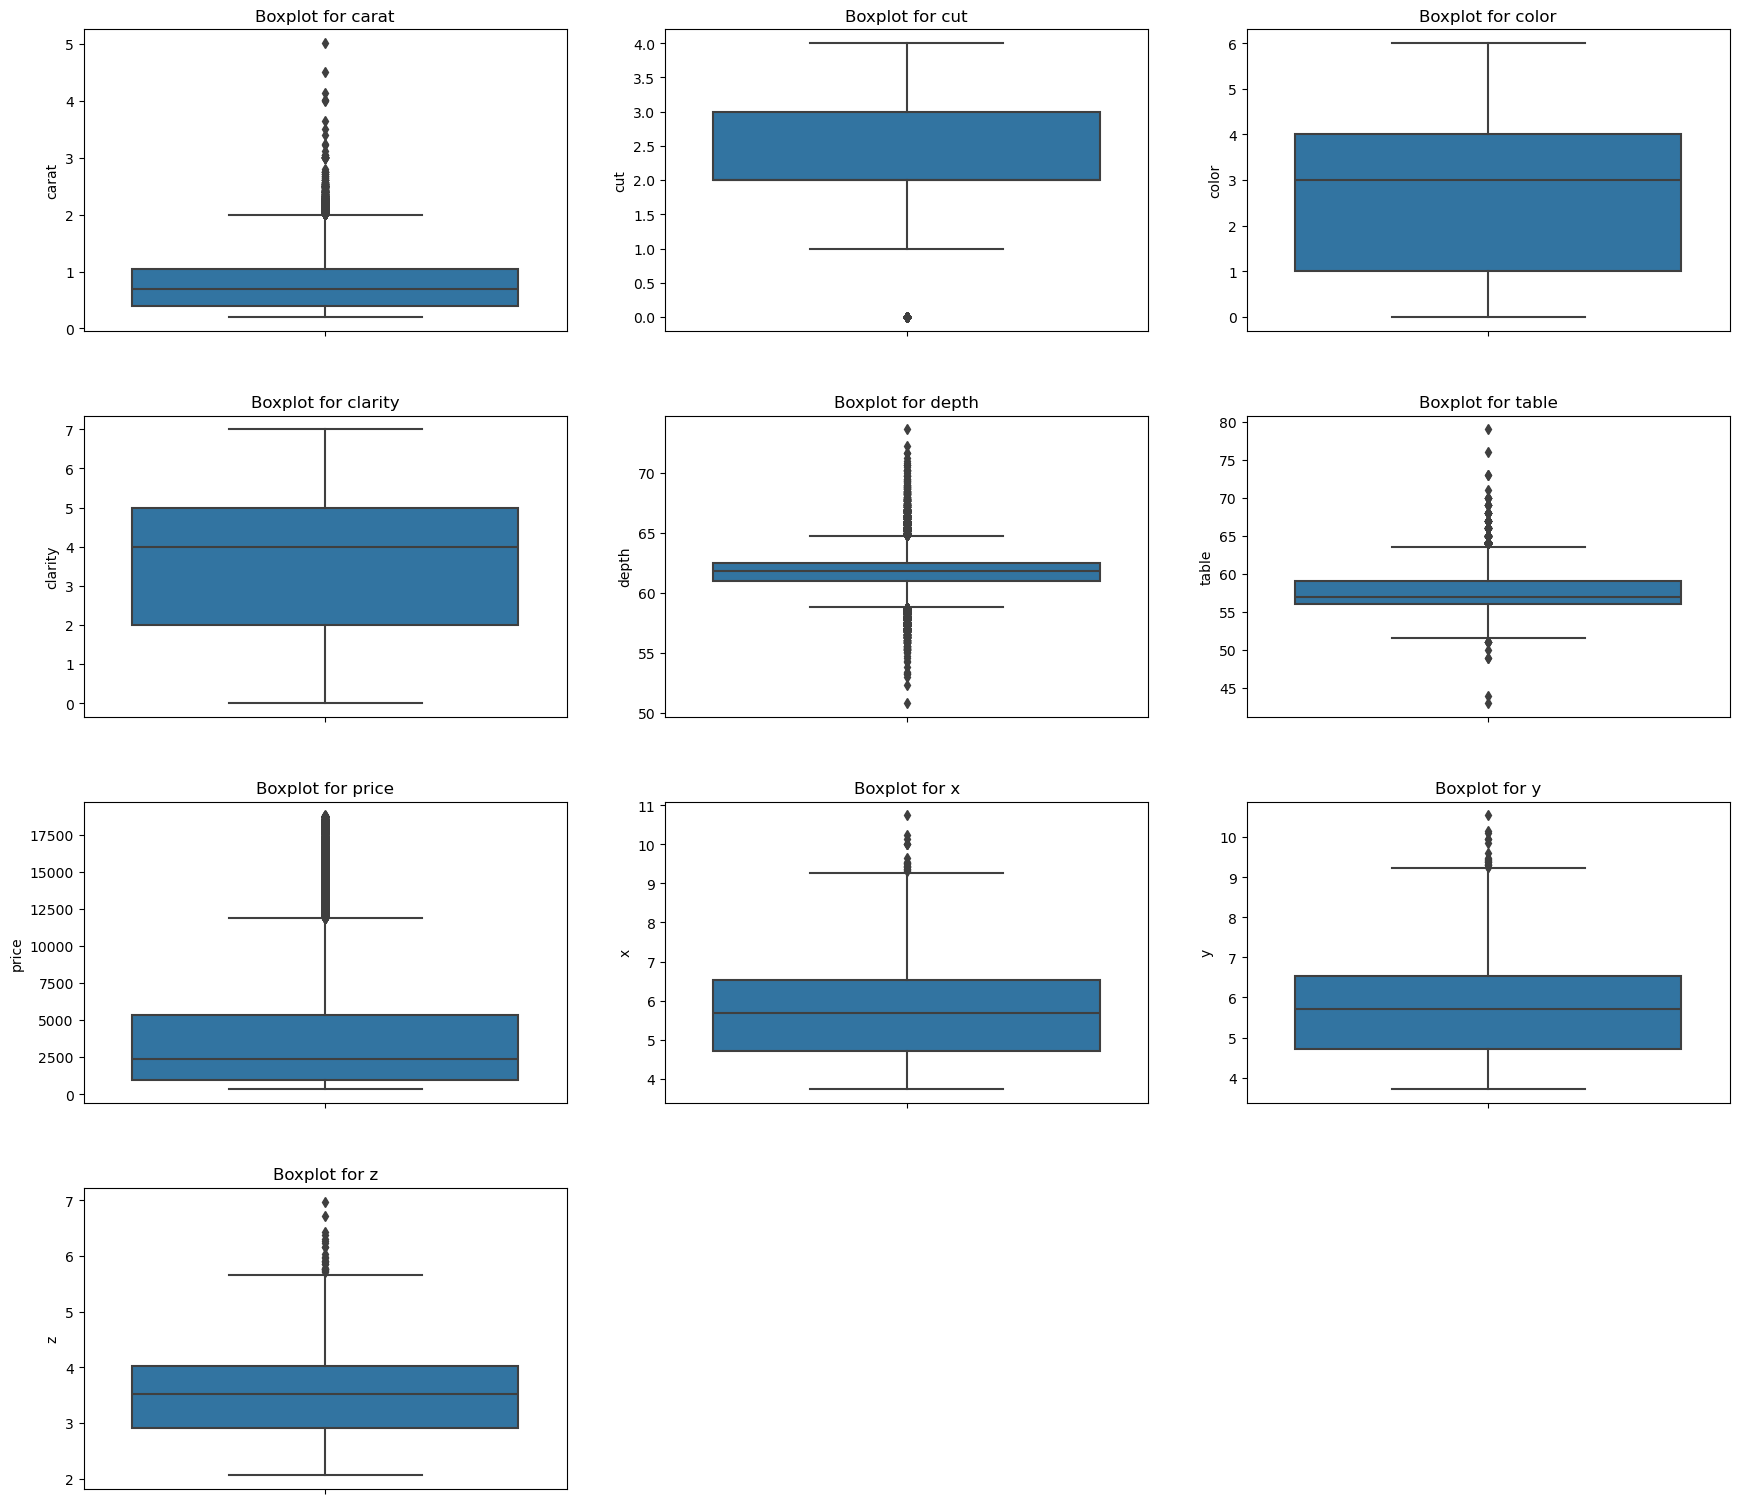

In [39]:
# # Ящик с усами (boxplot) для числовой переменной

# Найдем все числовые столбцы
numerical_columns = df.select_dtypes(include='number').columns

# Определим количество столбцов и строк для сетки
n_cols = 3  # Количество графиков в строке
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Расчет количества строк

# Создаем сетку графиков
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
fig.tight_layout(pad=4.0)  # Отступы между графиками

# Перебираем все числовые столбцы и создаем для каждого boxplot
for i, column in enumerate(numerical_columns):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(data=df, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot for {column}')

# Удаляем пустые оси, если их больше, чем данных
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.show()

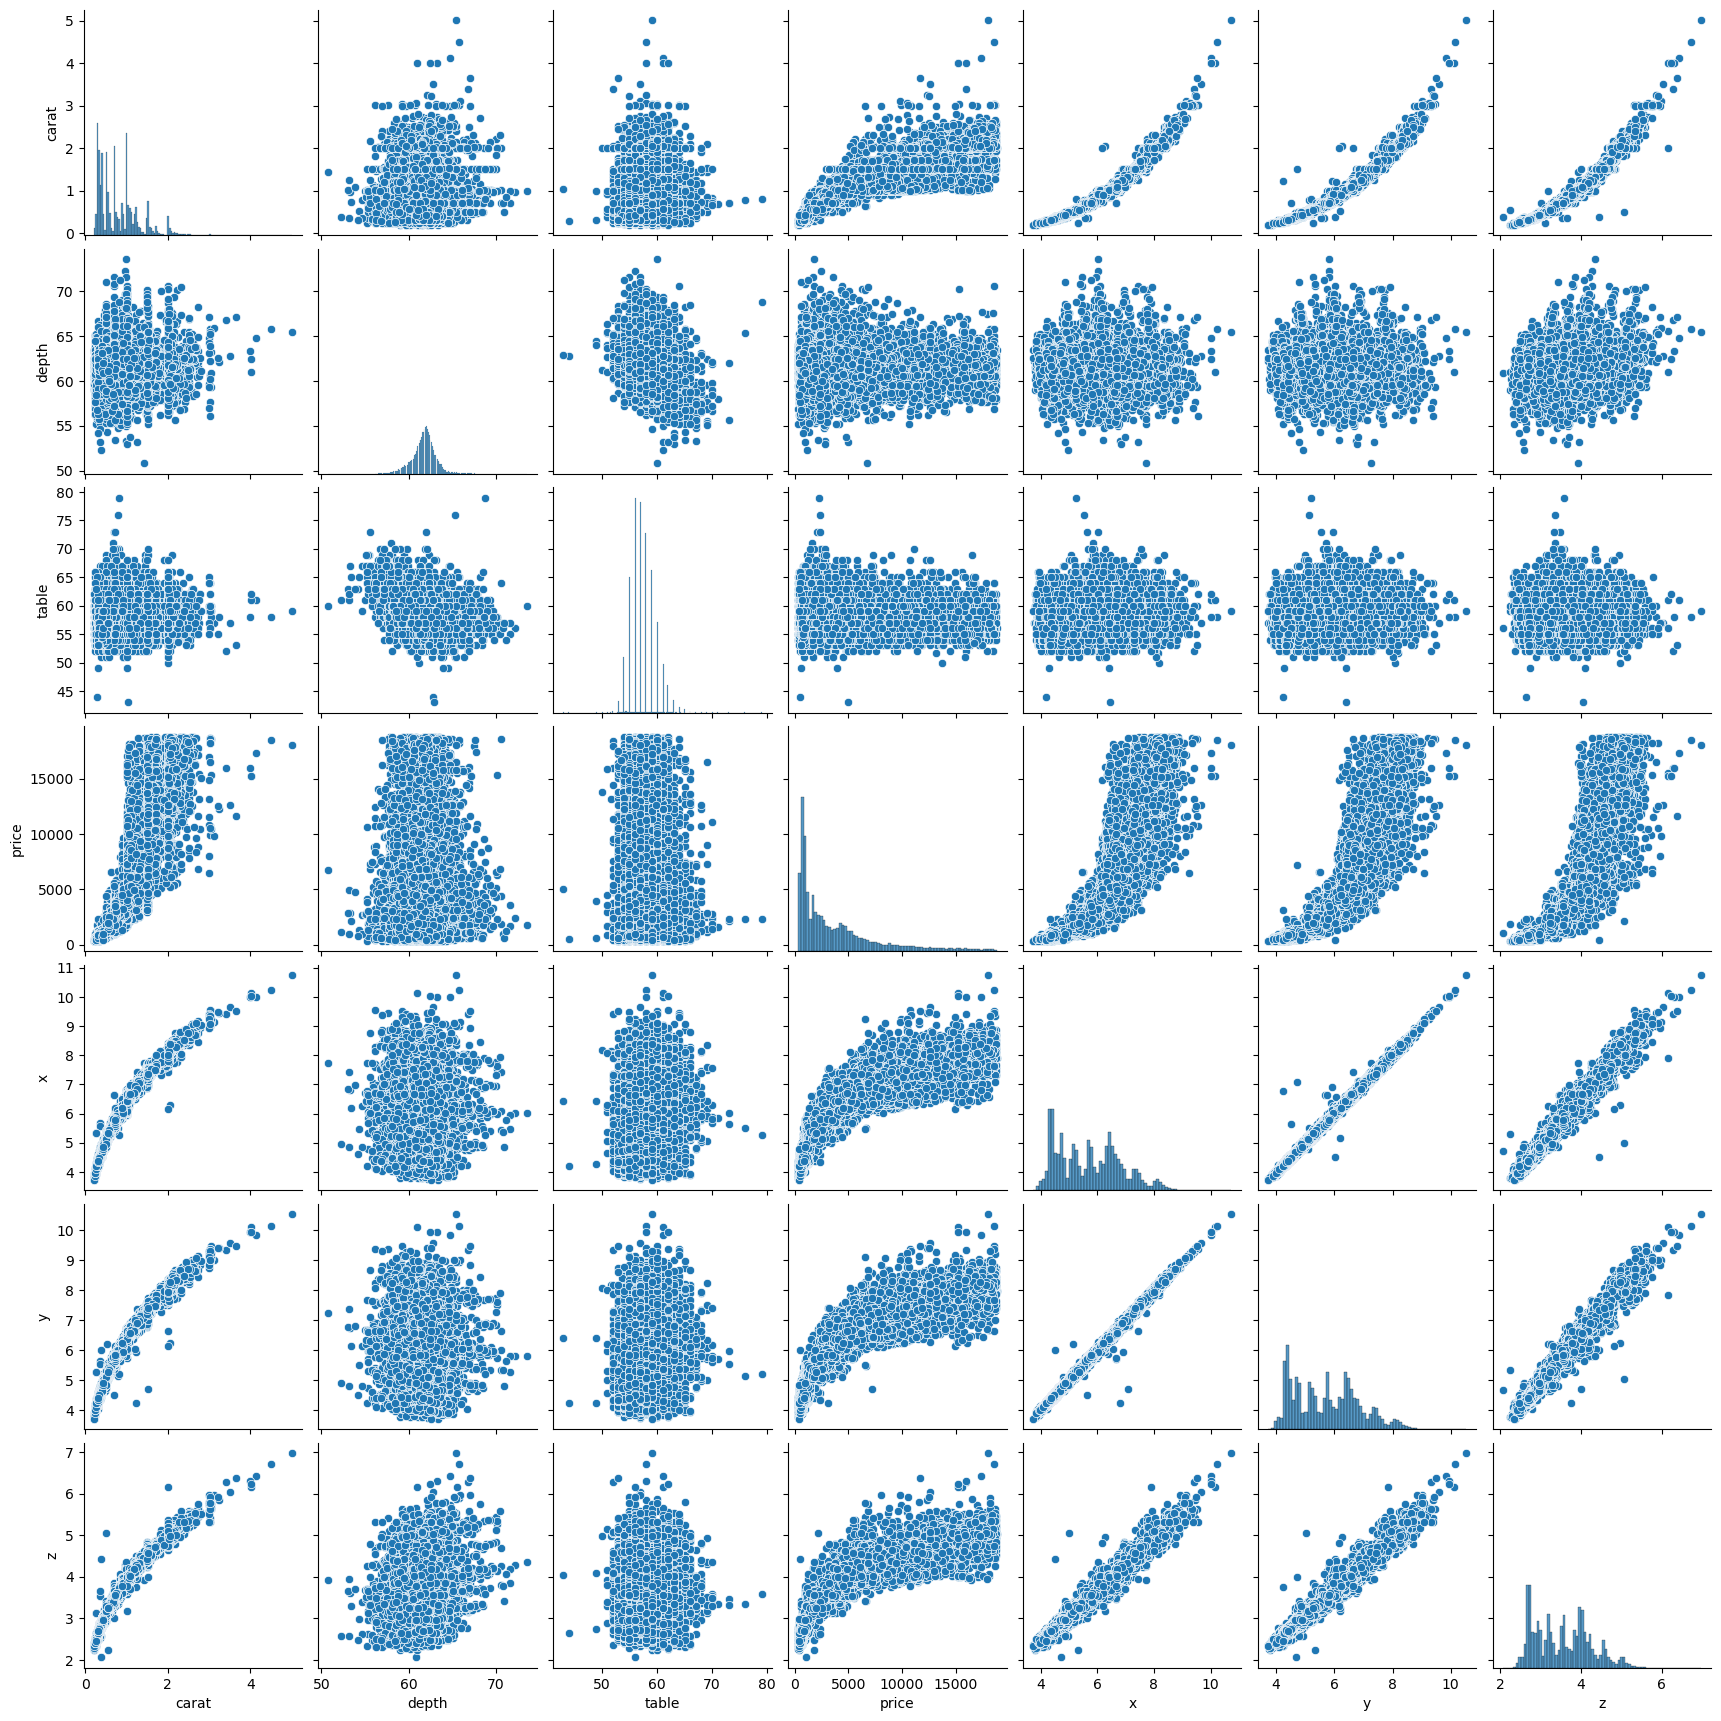

In [40]:
import seaborn as sns
# Предположим, у вас есть DataFrame df
sns.pairplot(data=df.loc[:, ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])
plt.show()

# **Посмотрим, что в тесте** 

In [41]:
path_test = 'test.csv'
df_test = pd.read_csv(path_test)

In [42]:
display(df_test.describe())

carat         depth         table             x             y  \
count  13485.000000  13485.000000  13485.000000  13485.000000  13485.000000   
mean       0.800079     61.758962     57.474082      5.738628      5.739944   
std        0.472734      1.467693      2.245183      1.116242      1.108039   
min        0.200000     43.000000     50.000000      3.730000      3.680000   
25%        0.400000     61.000000     56.000000      4.720000      4.730000   
50%        0.700000     61.800000     57.000000      5.700000      5.710000   
75%        1.050000     62.500000     59.000000      6.550000      6.550000   
max        3.670000     79.000000     73.000000      9.860000      9.810000   

                  z  
count  13485.000000  
mean       3.542345  
std        0.694000  
min        0.000000  
25%        2.920000  
50%        3.520000  
75%        4.040000  
max        6.130000

In [43]:
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    13485 non-null  float64
 1   cut      13485 non-null  object 
 2   color    13485 non-null  object 
 3   clarity  13485 non-null  object 
 4   depth    13485 non-null  float64
 5   table    13485 non-null  float64
 6   x        13485 non-null  float64
 7   y        13485 non-null  float64
 8   z        13485 non-null  float64
dtypes: float64(6), object(3)
memory usage: 948.3+ KB


None

In [44]:
display(df_test.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [45]:
display(df_test[df_test.duplicated()]) # 14 

carat        cut color clarity  depth  table     x     y     z
333     0.34      Ideal     F      IF   61.7   55.0  4.49  4.52  2.78
3553    0.71       Good     I     VS2   64.3   63.0  5.63  5.56  3.60
4998    0.50       Fair     E     VS2   79.0   73.0  5.21  5.18  4.09
5348    0.71      Ideal     F     VS1   61.9   56.0  5.70  5.74  3.54
7549    1.03      Ideal     G     SI1   60.9   57.0  6.54  6.50  3.97
7785    2.01    Premium     H     VS2   61.1   61.0  8.14  8.09  4.96
7804    0.40  Very Good     F    VVS2   60.5   57.0  4.76  4.79  2.89
10180   1.50  Very Good     G     SI2   63.1   57.0  7.29  7.25  4.59
10612   1.01       Fair     F     VS2   64.8   56.0  6.30  6.25  4.07
10864   1.50       Good     G     SI2   57.5   63.0  7.53  7.49  4.32
11008   1.09    Premium     H     SI2   61.2   62.0  6.63  6.58  4.04
11603   0.32      Ideal     E     SI2   61.3   56.0  4.42  4.45  2.72
12247   0.31      Ideal     F    VVS1   62.0   55.0  4.34  4.37  2.70
12434   1.52    Premium     I     SI1   61.2   60.0  7.41  7.36  4.52

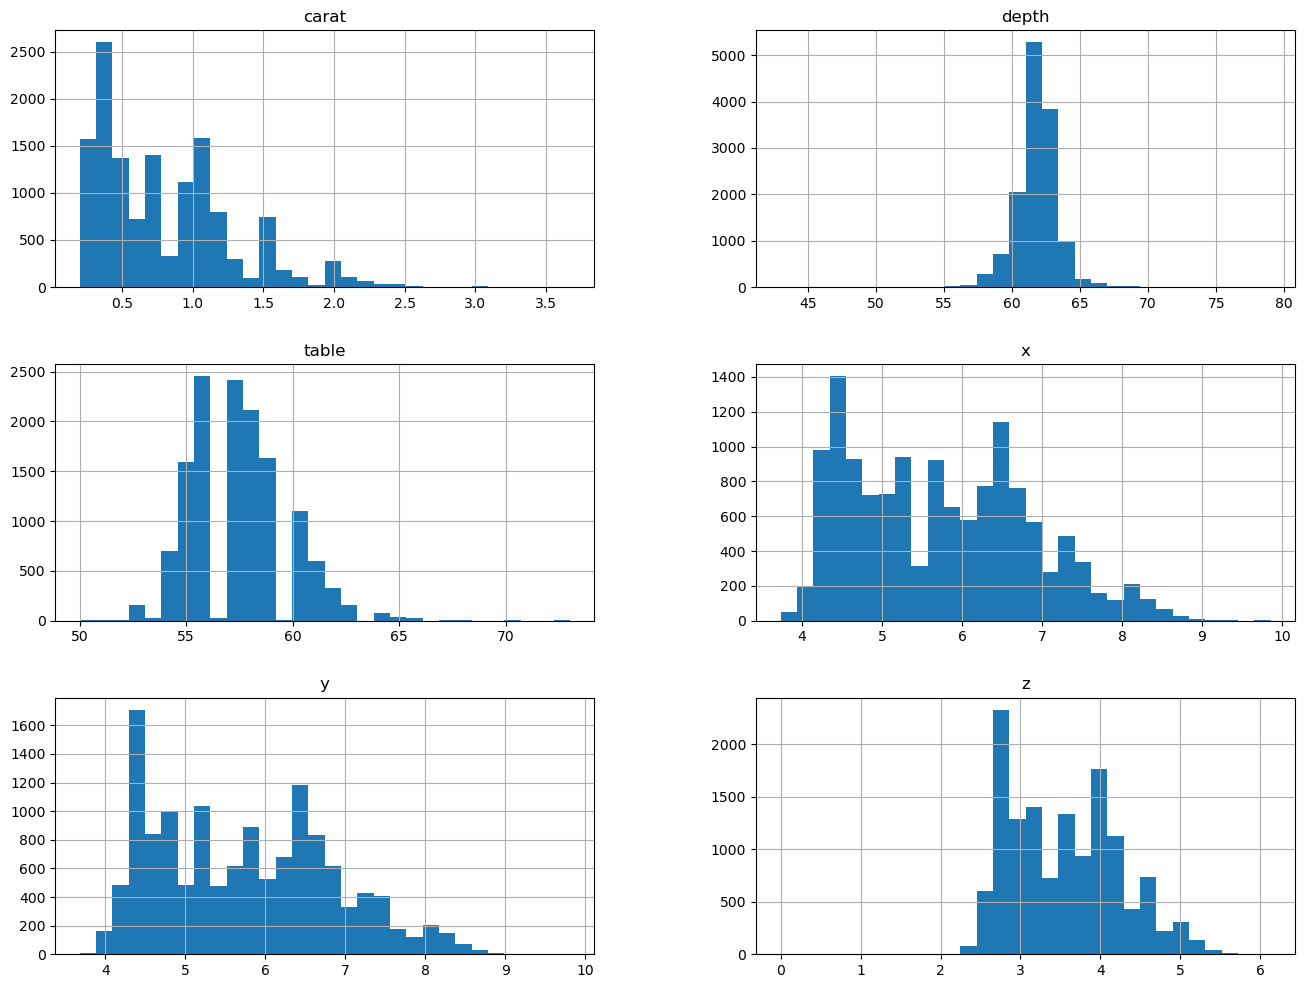

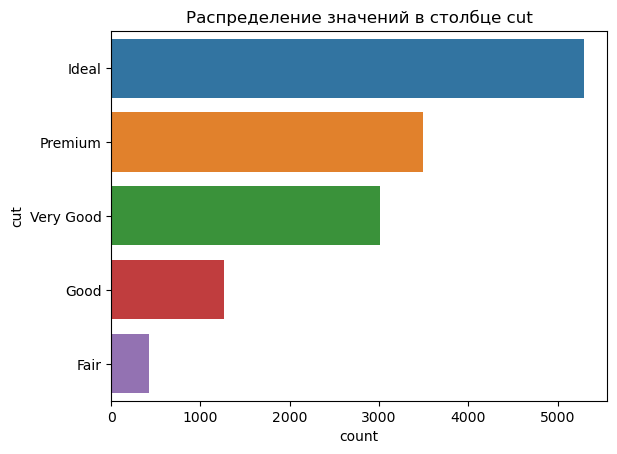

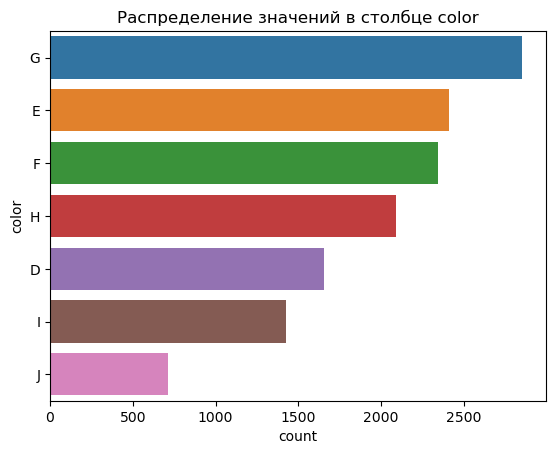

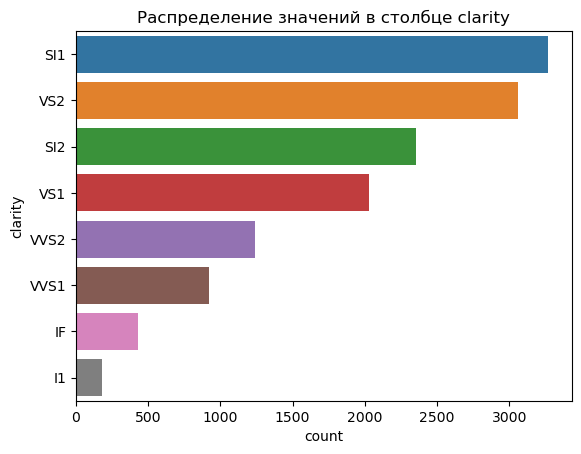

In [46]:
# Гистограммы для всех числовых столбцов
df_test.hist(figsize=(16, 12), bins=30)
plt.show()

# Анализ категориальных признаков
for col in df_test.select_dtypes(include=['object']).columns:
    sns.countplot(y=col, data=df_test, order=df_test[col].value_counts().index)
    plt.title(f'Распределение значений в столбце {col}')
    plt.show()

In [47]:
def analyze_categorical(df):
    # Получаем все категориальные переменные (объекты и категории)
    categorical_cols = df_test.select_dtypes(include=['object', 'category']).columns
    
    if len(categorical_cols) == 0:
        print("В датафрейме нет категориальных переменных.")
        return
    
    for col in categorical_cols:
        print(f"=== Анализ '{col}' ===")
        
        # Уникальные значения
        unique_vals = df_test[col].unique()
        print(f"Уникальные значения: {unique_vals}")
        
        # Частота значений
        value_counts = df_test[col].value_counts()
        print(f"\nЧастота значений:\n{value_counts}")
        
        # Проверка на пропуски
        missing_count = df_test[col].isnull().sum()
        if missing_count > 0:
            print(f"\nПропущенные значения: {missing_count}")
        else:
            print("\nПропущенных значений нет.")
        
        display("\n" + "="*30 + "\n")

# Вызов функции для анализа
analyze_categorical(df_test)

=== Анализ 'cut' ===
Уникальные значения: ['Fair' 'Premium' 'Ideal' 'Good' 'Very Good']

Частота значений:
cut
Ideal        5291
Premium      3489
Very Good    3009
Good         1268
Fair          428
Name: count, dtype: int64

Пропущенных значений нет.


'\n==============================\n'

=== Анализ 'color' ===
Уникальные значения: ['H' 'G' 'E' 'F' 'J' 'I' 'D']

Частота значений:
color
G    2853
E    2409
F    2345
H    2087
D    1652
I    1426
J     713
Name: count, dtype: int64

Пропущенных значений нет.


'\n==============================\n'

=== Анализ 'clarity' ===
Уникальные значения: ['VS2' 'SI2' 'VVS2' 'VS1' 'SI1' 'VVS1' 'IF' 'I1']

Частота значений:
clarity
SI1     3270
VS2     3062
SI2     2351
VS1     2028
VVS2    1243
VVS1     918
IF       430
I1       183
Name: count, dtype: int64

Пропущенных значений нет.


'\n==============================\n'

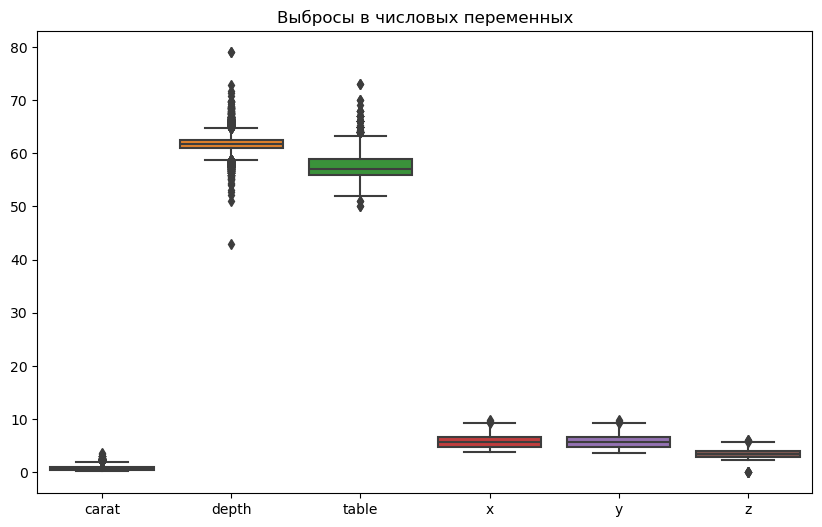

In [48]:
# Ящик с усами для выявления выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_test.select_dtypes(include=['float64', 'int64']))
plt.title("Выбросы в числовых переменных")
plt.show()

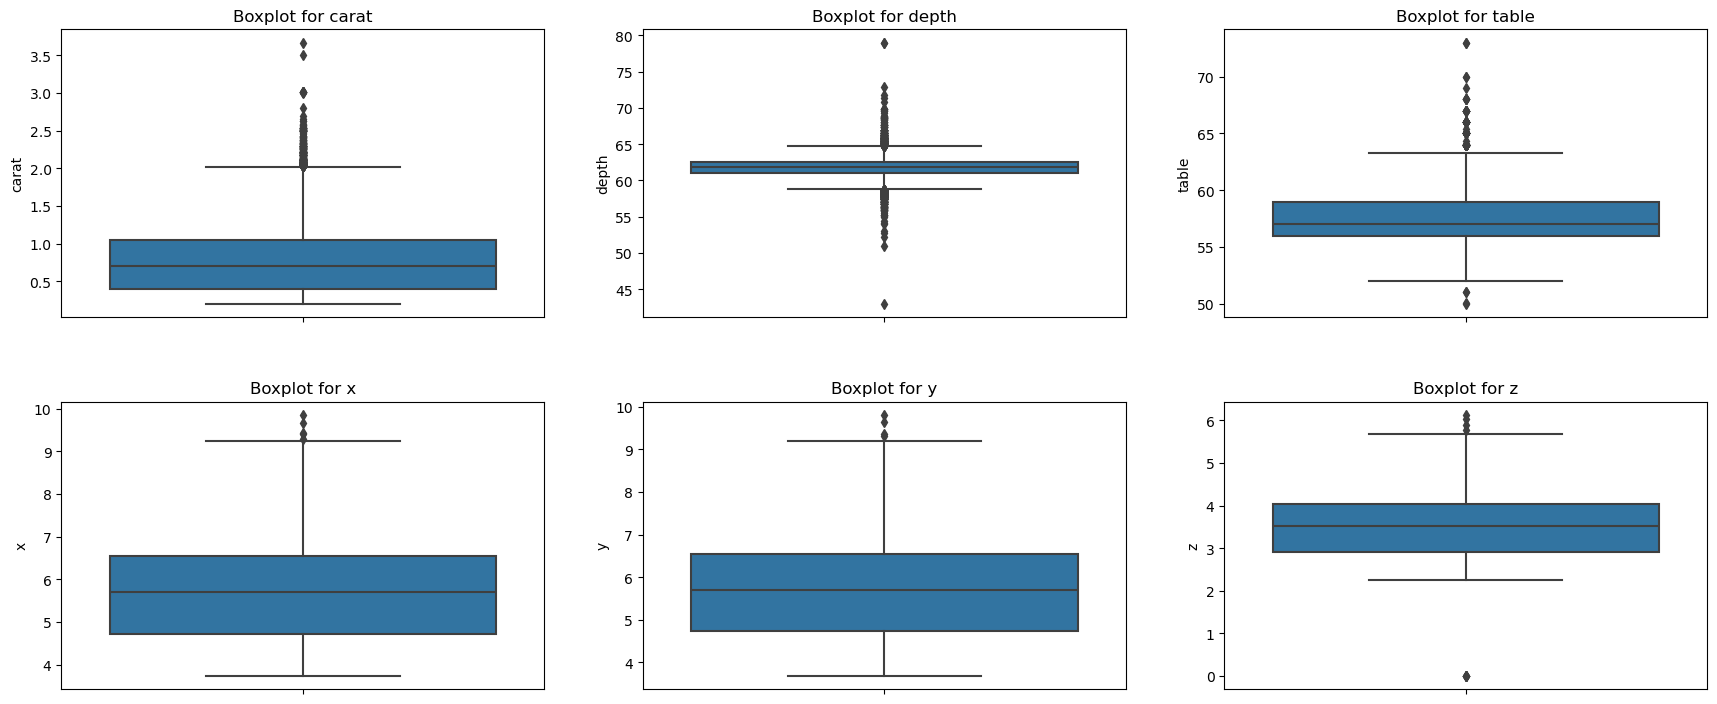

In [49]:
# # Ящик с усами (boxplot) для числовой переменной

# Найдем все числовые столбцы
numerical_columns = df_test.select_dtypes(include='number').columns

# Определим количество столбцов и строк для сетки
n_cols = 3  # Количество графиков в строке
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Расчет количества строк

# Создаем сетку графиков
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
fig.tight_layout(pad=4.0)  # Отступы между графиками

# Перебираем все числовые столбцы и создаем для каждого boxplot
for i, column in enumerate(numerical_columns):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(data=df_test, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot for {column}')

# Удаляем пустые оси, если их больше, чем данных
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.show()

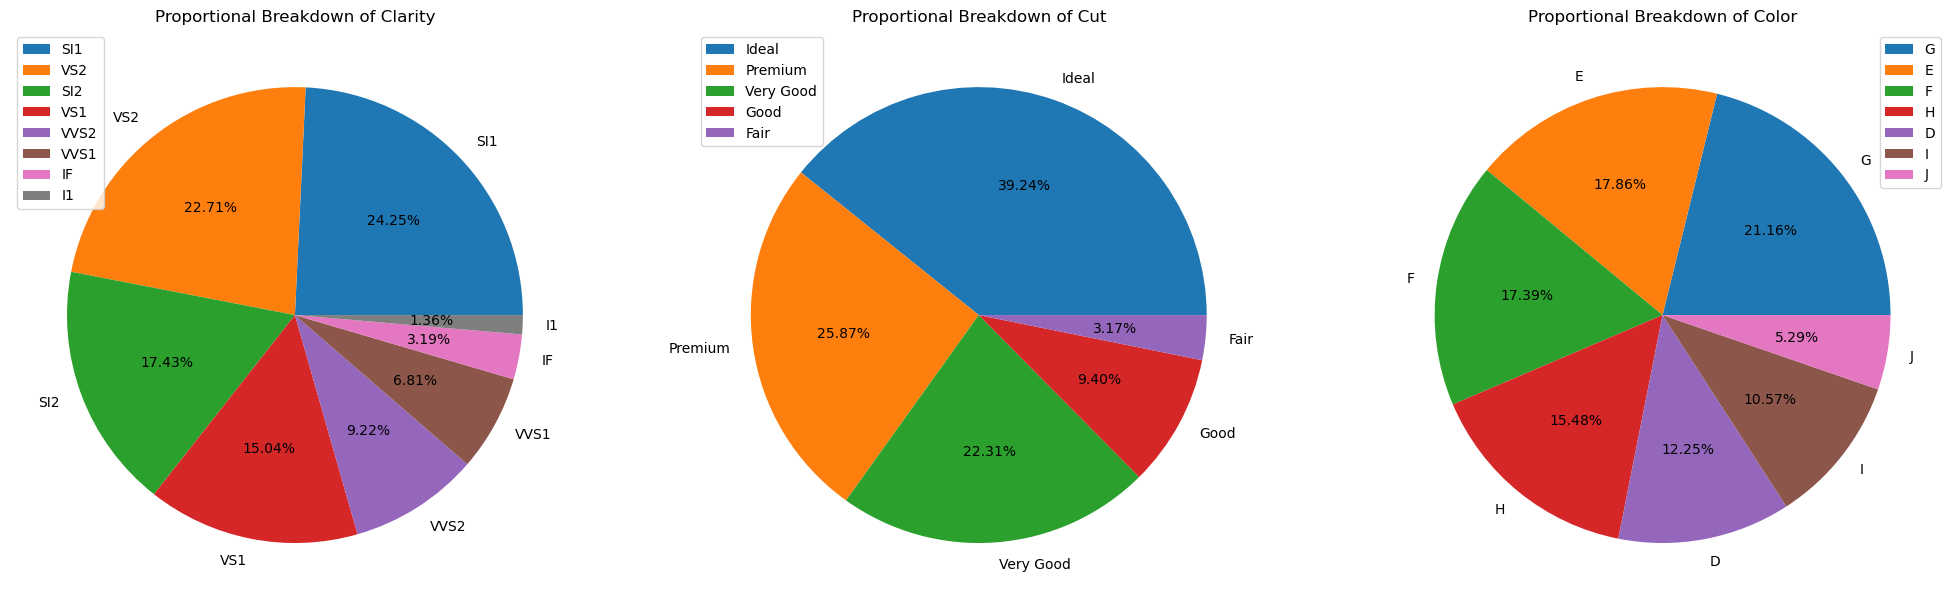

In [50]:
k=df_test['clarity'].value_counts().reset_index()
k.columns=(['clarity','count'])
k1=df_test['cut'].value_counts().reset_index()
k1.columns=(['cut','count'])
k2=df_test['color'].value_counts().reset_index()
k2.columns=(['color','count'])
ax,fig=plt.subplots(1,3,figsize=(25,20))
fig[0].pie(x=k['count'],labels=k['clarity'],autopct='%.2f%%')
fig[0].set_title("Proportional Breakdown of Clarity")
fig[0].legend(k['clarity'])
fig[1].pie(x=k1['count'],labels=k1['cut'],autopct='%.2f%%')
fig[1].set_title("Proportional Breakdown of Cut")
fig[1].legend(k1['cut'])
fig[2].pie(x=k2['count'],labels=k2['color'],autopct='%.2f%%')
fig[2].set_title("Proportional Breakdown of Color")
fig[2].legend(k2['color'])
plt.show()

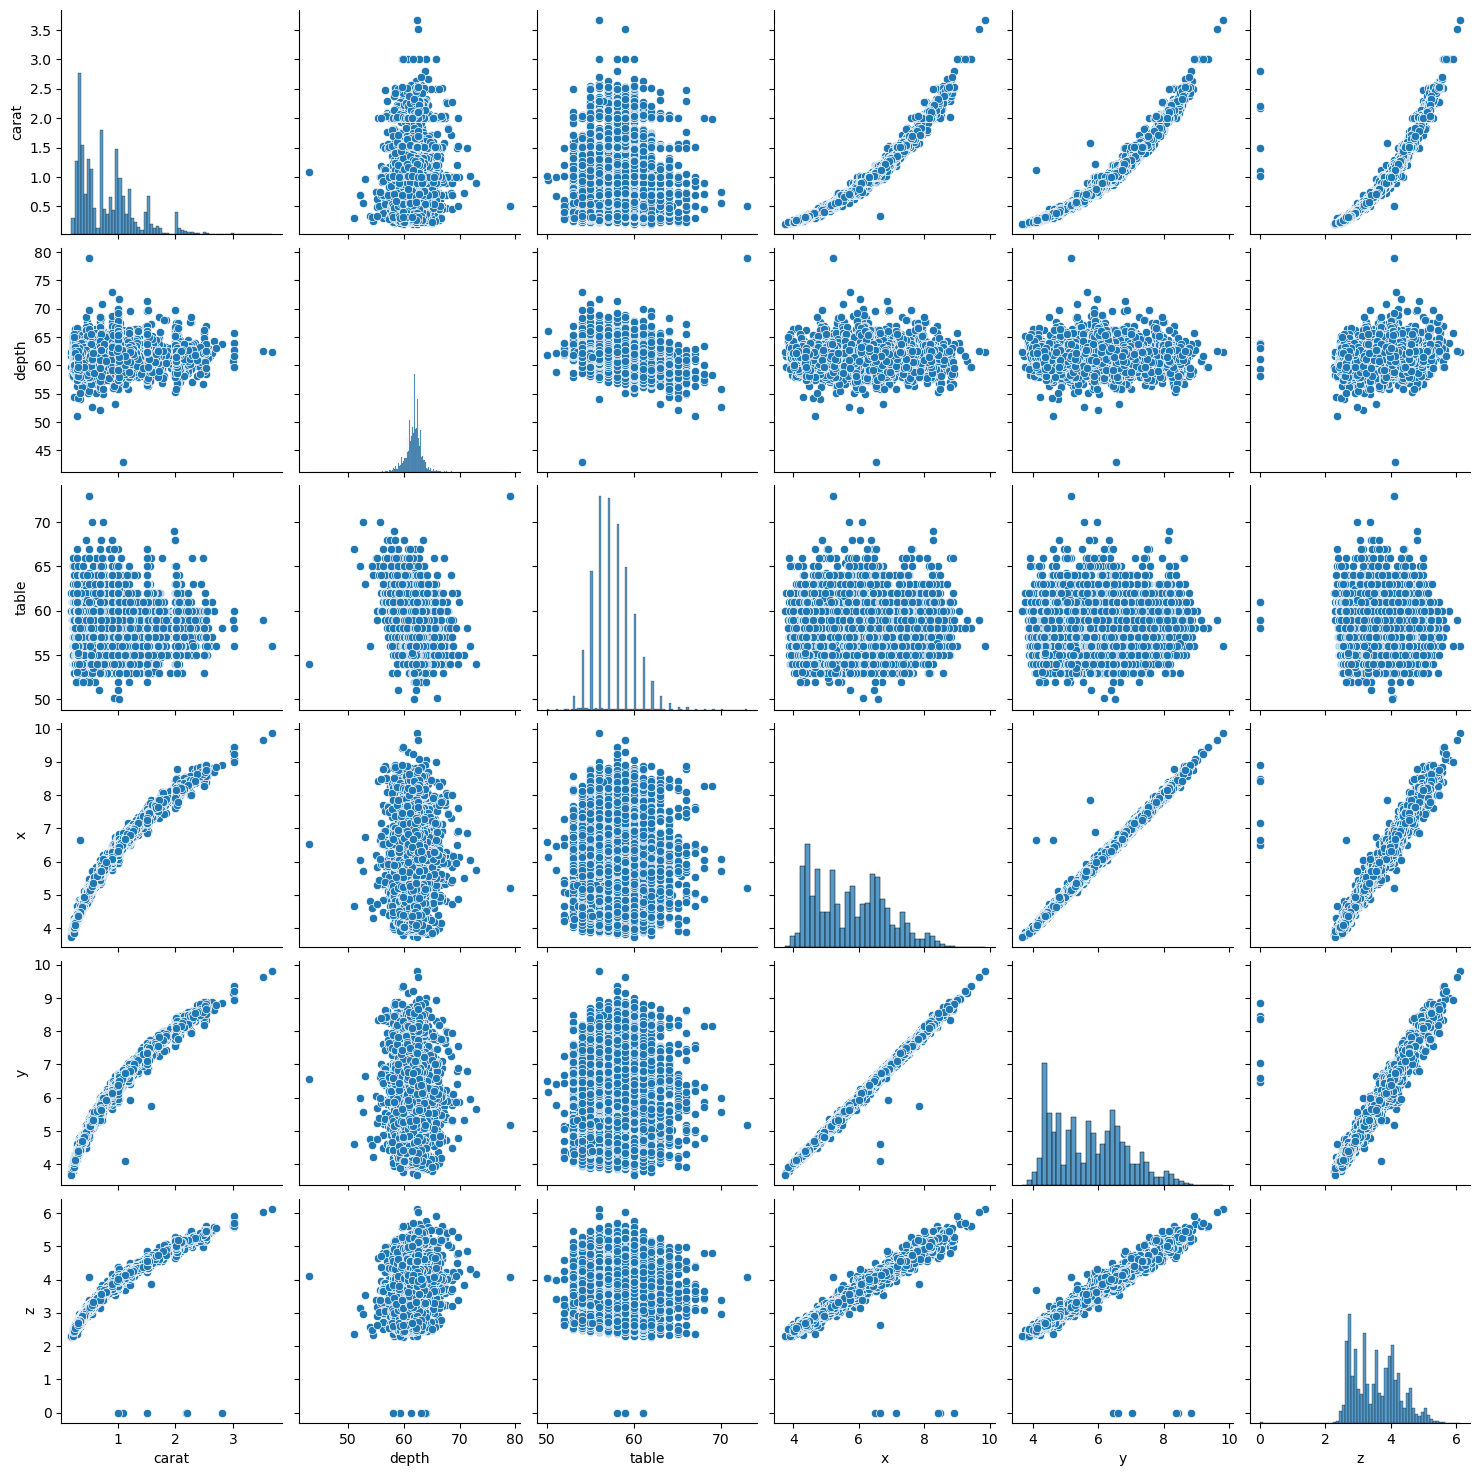

In [51]:
sns.pairplot(df_test)
plt.show()

# **Очумелые ручки, проверяют влияет ли цвет на модельку** 

In [52]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Создаем модель с использованием формулы
model = ols('price ~ C(color)', data=df).fit()

# Проводим ANOVA-тест
anova_table = sm.stats.anova_lm(model, typ=2)

# Выводим результаты
print(anova_table)

                sum_sq       df           F         PR(>F)
C(color)  1.986569e+10      6.0  213.905009  8.616976e-270
Residual  6.245149e+11  40347.0         NaN            NaN


In [53]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Получаем остатки и предсказанные значения из модели
residuals = model.resid
fitted_values = model.fittedvalues

# Тест Бройша-Пагана
bp_test = het_breuschpagan(residuals, model.model.exog)

# Выводим результаты теста
print('Breusch-Pagan test p-value:', bp_test[1])


Breusch-Pagan test p-value: 1.50510400054071e-107


In [57]:
df['color'].unique()

array([5, 1, 0, 4, 2, 3, 6])

In [ ]:
# МИНИ_ОБЗОР, ну а весь траш он в папке (лучше не смотреть)

In [ ]:
path_train = 'train.csv' # содержит только имя файла, без имен папок !!!
df = pd.read_csv(path_train)
df = df[(df['x'] >= 2) & (df['x'] <= 11)]
df = df[(df['y'] >= 2) & (df['y'] <= 11)]
df = df[(df['z'] >= 2) & (df['z'] <= 7)]

df = df[(df['table'] >= 40) & (df['table'] <= 80)]
df = df[(df['depth'] >= 45) & (df['depth'] <= 75)]

df = df.drop_duplicates()

df.shape


X = df.drop(['price'], axis=1)
y = df['price']                 

# Разделение данных на обучающую и тестовую выборки с тестовой выборкой 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, OrdinalEncoder, PowerTransformer
from sklearn.linear_model import QuantileRegressor  
from sklearn.model_selection import train_test_split



num_features = ['carat', 'depth', 'table']
cat_features = ['cut', 'color', 'clarity']
axis_features = ['x', 'y', 'z']

# Пайплайн для числовых признаков
num_pipeline = Pipeline(steps=[
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),  
    ('power', PowerTransformer(method='yeo-johnson', standardize=True)), 
    ('scaler', StandardScaler())  # масштабирование признаков
])

# Пайплайн для категориальных признаков
cat_pipeline = Pipeline(steps=[
    ('encoder', OrdinalEncoder()),  
    ('scaler', MinMaxScaler())  
])

# Пайплайн для осевых признаков
axis_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Масштабирование
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  
    ('power', PowerTransformer(method='yeo-johnson', standardize=True))  #=
])


CT = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_features),
        ("cat", cat_pipeline, cat_features),
        ('axis', axis_pipeline, axis_features)
    ],
    remainder='drop'  
).set_output(transform='pandas')


X_train_transformed = CT.fit_transform(X_train)


transformed_columns = CT.get_feature_names_out()
transformed_df = pd.DataFrame(data=X_train_transformed, columns=transformed_columns)
display(transformed_df)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, OneHotEncoder, PowerTransformer, RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import (
    LinearRegression, Ridge, SGDRegressor, ElasticNet, Lasso, HuberRegressor,
    QuantileRegressor, RANSACRegressor, TheilSenRegressor, TweedieRegressor
)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np
import pandas as pd


models_and_params = [
    {
        'model': Ridge(),
        'params': {'regressor__alpha': np.linspace(0.1, 1, 20)}
    },
    {
        'model': Lasso(),
        'params': {'regressor__alpha': np.linspace(0.1, 1, 20)}
    },
    {
        'model': ElasticNet(),
        'params': {'regressor__alpha': np.linspace(0.1, 1, 20)}
    },
    {
        'model': SGDRegressor(max_iter=1000, tol=1e-3),
        'params': {'regressor__alpha': np.linspace(0.0001, 0.1, 20), 'regressor__penalty': ['l2', 'l1', 'elasticnet']}
    },
    {
        'model': HuberRegressor(),
        'params': {'regressor__alpha': np.linspace(0.1, 1, 10)}
    },
    {
        'model': QuantileRegressor(quantile=0.5),
        'params': {'regressor__alpha': np.linspace(0.1, 1, 10)}
    },
    {
        'model': RANSACRegressor(),
        'params': {}
    },
    {
        'model': TheilSenRegressor(),
        'params': {}
    },
    {
        'model': TweedieRegressor(power=1, alpha=0.5),
        'params': {'regressor__alpha': np.linspace(0.1, 1, 10)}
    }
]

# Пайплайн для предварительной обработки данных
preproc_pipeline = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
            ('power', PowerTransformer(method='yeo-johnson', standardize=True)),
            ('scaler', RobustScaler())
        ]), num_features),
        ("cat", Pipeline(steps=[
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), cat_features),
        ("axis", Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False)),
            ('pca', PCA(n_components=2))
        ]), axis_features)
    ],
    remainder='drop'
).set_output(transform='pandas')


results = []


scorer = make_scorer(mean_squared_error, greater_is_better=False)


for entry in models_and_params:

    model_pipeline = Pipeline(steps=[
        ('preproc', preproc_pipeline),
        ('regressor', entry['model'])
    ])


    grid_search = GridSearchCV(model_pipeline, {'regressor': [entry['model']], **entry['params']}, 
                               n_jobs=-1, scoring=scorer, cv=5)


    grid_search.fit(X_train, y_train)


    results.append({
        'model': entry['model'].__class__.__name__,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    })


for result in results:
    print(f"Модель: {result['model']}")
    print(f"Лучшие параметры: {result['best_params']}")
    print(f"Лучшее значение метрики (MSE): {result['best_score']:.4f}")
    print('-' * 30)

In [ ]:
model = Pipeline(steps=[
    ('preproc', CT),  # Предварительная обработка данных
    ('regressor', Ridge())  # Линейная регрессия с регуляризацией (Ridge)
]) 
# Обучение модели
model.fit(X_train, y_train)

In [ ]:
param_grid = {
    'regressor': [Ridge(), Lasso(), ElasticNet()],          # Модели для настройки
    'regressor__alpha': np.linspace(0.1, 1, 20),            # Параметр регуляризации для моделей
}

# Настройка GridSearchCV
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, scoring='neg_mean_squared_error')

# Пример обучения с GridSearchCV
grid_search.fit(X_train, y_train)

# Лучшие параметры и метрика
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение метрики:", grid_search.best_score_)

In [ ]:
grid_result = pd.DataFrame(grid_search.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

In [ ]:
# Получение лучших моделей
best_model = grid_search.best_estimator_
#best_model = model 

In [ ]:
# y_pred = model.predict(X)
y_pred = best_model.predict(X_test)
mean_squared_error(y_test, y_pred)

In [ ]:
# Выявление выбросов с помощью метода IQR 
delta = y_pred - y_test

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

Q25 = np.quantile(delta, 0.25)
Q75 = np.quantile(delta, 0.75)
irq = Q75-Q25

ax1.hist(delta, bins=40)
ax1.axvline(x=(Q25-1.5*irq), color='k', linestyle='--')
ax1.axvline(x=(Q75+1.5*irq), color='k', linestyle='--')
sns.boxplot(x=delta, ax=ax2);

In [ ]:
mask = (delta<(Q25-1.5*irq)) | (delta> (Q75+1.5*irq))
mask.sum()

In [ ]:
def irq_mse(y_true, y_predict):
    delta = y_predict - y_true
    Q25 = np.quantile(delta, 0.25)
    Q75 = np.quantile(delta, 0.75)
    irq = Q75 - Q25
    mask = (delta < (Q25 - 1.5 * irq)) | (delta > (Q75 + 1.5 * irq))
    if (mask.sum() == 0):
        rez = 0
    else:
        rez = -sum((delta[mask]) ** 2) / mask.sum()
    return rez

In [ ]:
# irq_mse(y_test, y_pred)
print(f"IQR MSE: {irq_mse(y_test, y_pred)}")

# **НУ А ДАЛЬШЕ Я РАЗВЛЕКАЛСЯ, ну а это все в других папках, мне было не удобно все делать в одном файле, этот файл был создан искусственно, ну, а так я прислал одну из многочисленных папок с моделями** 